In [19]:
#Importer les librairies Python nécessaires pour le projet
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
import missingno as msno

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from scipy import stats 
from scipy.stats import f_oneway, kruskal
from scipy.stats import shapiro, kstest, yeojohnson, boxcox

#Versions 
print('Version des librairies utilisées :')
print('Pandas : ' + pd.__version__)
print('NumPy : ' + np.__version__)
print('Matplotlib : ' + mpl.__version__)
print('Seaborn : ' + sns.__version__)
print('Missingno : ' + msno.__version__)

Version des librairies utilisées :
Pandas : 2.1.1
NumPy : 1.26.0
Matplotlib : 3.7.1
Seaborn : 0.13.1
Missingno : 0.5.2


## Enoncé
L'agence Santé publique France souhaite améliorer sa base de données Open Food Facts et fait appel aux services de votre entreprise. Cette base de données open source est mise à la disposition de particuliers et d’organisations afin de leur permettre de connaître **la qualité nutritionnelle de produits**.

L’agence Santé publique France confie à votre entreprise la création d’un système de suggestion ou d’auto-complétion pour aider les usagers à remplir plus efficacement la base de données. Dans un premier temps, vous devez vous concentrer sur la prise en main des données, et d’abord les nettoyer et les explorer.

Vous êtes missionné sur le projet de nettoyage et exploration des données en interne, afin de déterminer la faisabilité de cette idée d’application de Santé publique France.

## Mission

1) Traitement du jeu de données
2) Production de visualisations
3) Analyse multivariée
4) Rédaction d'un rapport d’exploration
5) Respect du RGPD


## I- Inspection des données et de la qualité des données. 

In [20]:
#Charger le fichier
df = pd.read_csv('fr.openfoodfacts.org.products.csv', delimiter = '\t')

C:\Users\Anais\AppData\Local\Temp\ipykernel_13856\3191362453.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fr.openfoodfacts.org.products.csv', delimiter = '\t')


In [21]:
#Afficher les premières et dernières lignes du dataframe pour vérifier les données
print(df.head())
print(df.tail())

    code                                                url  \
0   3087  http://world-fr.openfoodfacts.org/produit/0000...   
1   4530  http://world-fr.openfoodfacts.org/produit/0000...   
2   4559  http://world-fr.openfoodfacts.org/produit/0000...   
3  16087  http://world-fr.openfoodfacts.org/produit/0000...   
4  16094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (

In [22]:
#Combien de lignes et de colonnes sont contenus dans df ?
print('shape : ' + str(df.shape))

shape : (320772, 162)


In [23]:
#Affichage du nom des colonnes, du type des colonnes et du nombre de valeurs par colonne
print(df.info(verbose=True))
print(df.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    code                                        object 
 1    url                                         object 
 2    creator                                     object 
 3    created_t                                   object 
 4    created_datetime                            object 
 5    last_modified_t                             object 
 6    last_modified_datetime                      object 
 7    product_name                                object 
 8    generic_name                                object 
 9    quantity                                    object 
 10   packaging                                   object 
 11   packaging_tags                              object 
 12   brands                                      object 
 13   brands_tags 

code                       0.000072
url                        0.000072
creator                    0.000006
created_t                  0.000009
created_datetime           0.000028
                             ...   
carbon-footprint_100g      0.999165
nutrition-score-fr_100g    0.310382
nutrition-score-uk_100g    0.310382
glycemic-index_100g        1.000000
water-hardness_100g        1.000000
Length: 162, dtype: float64

<Axes: >

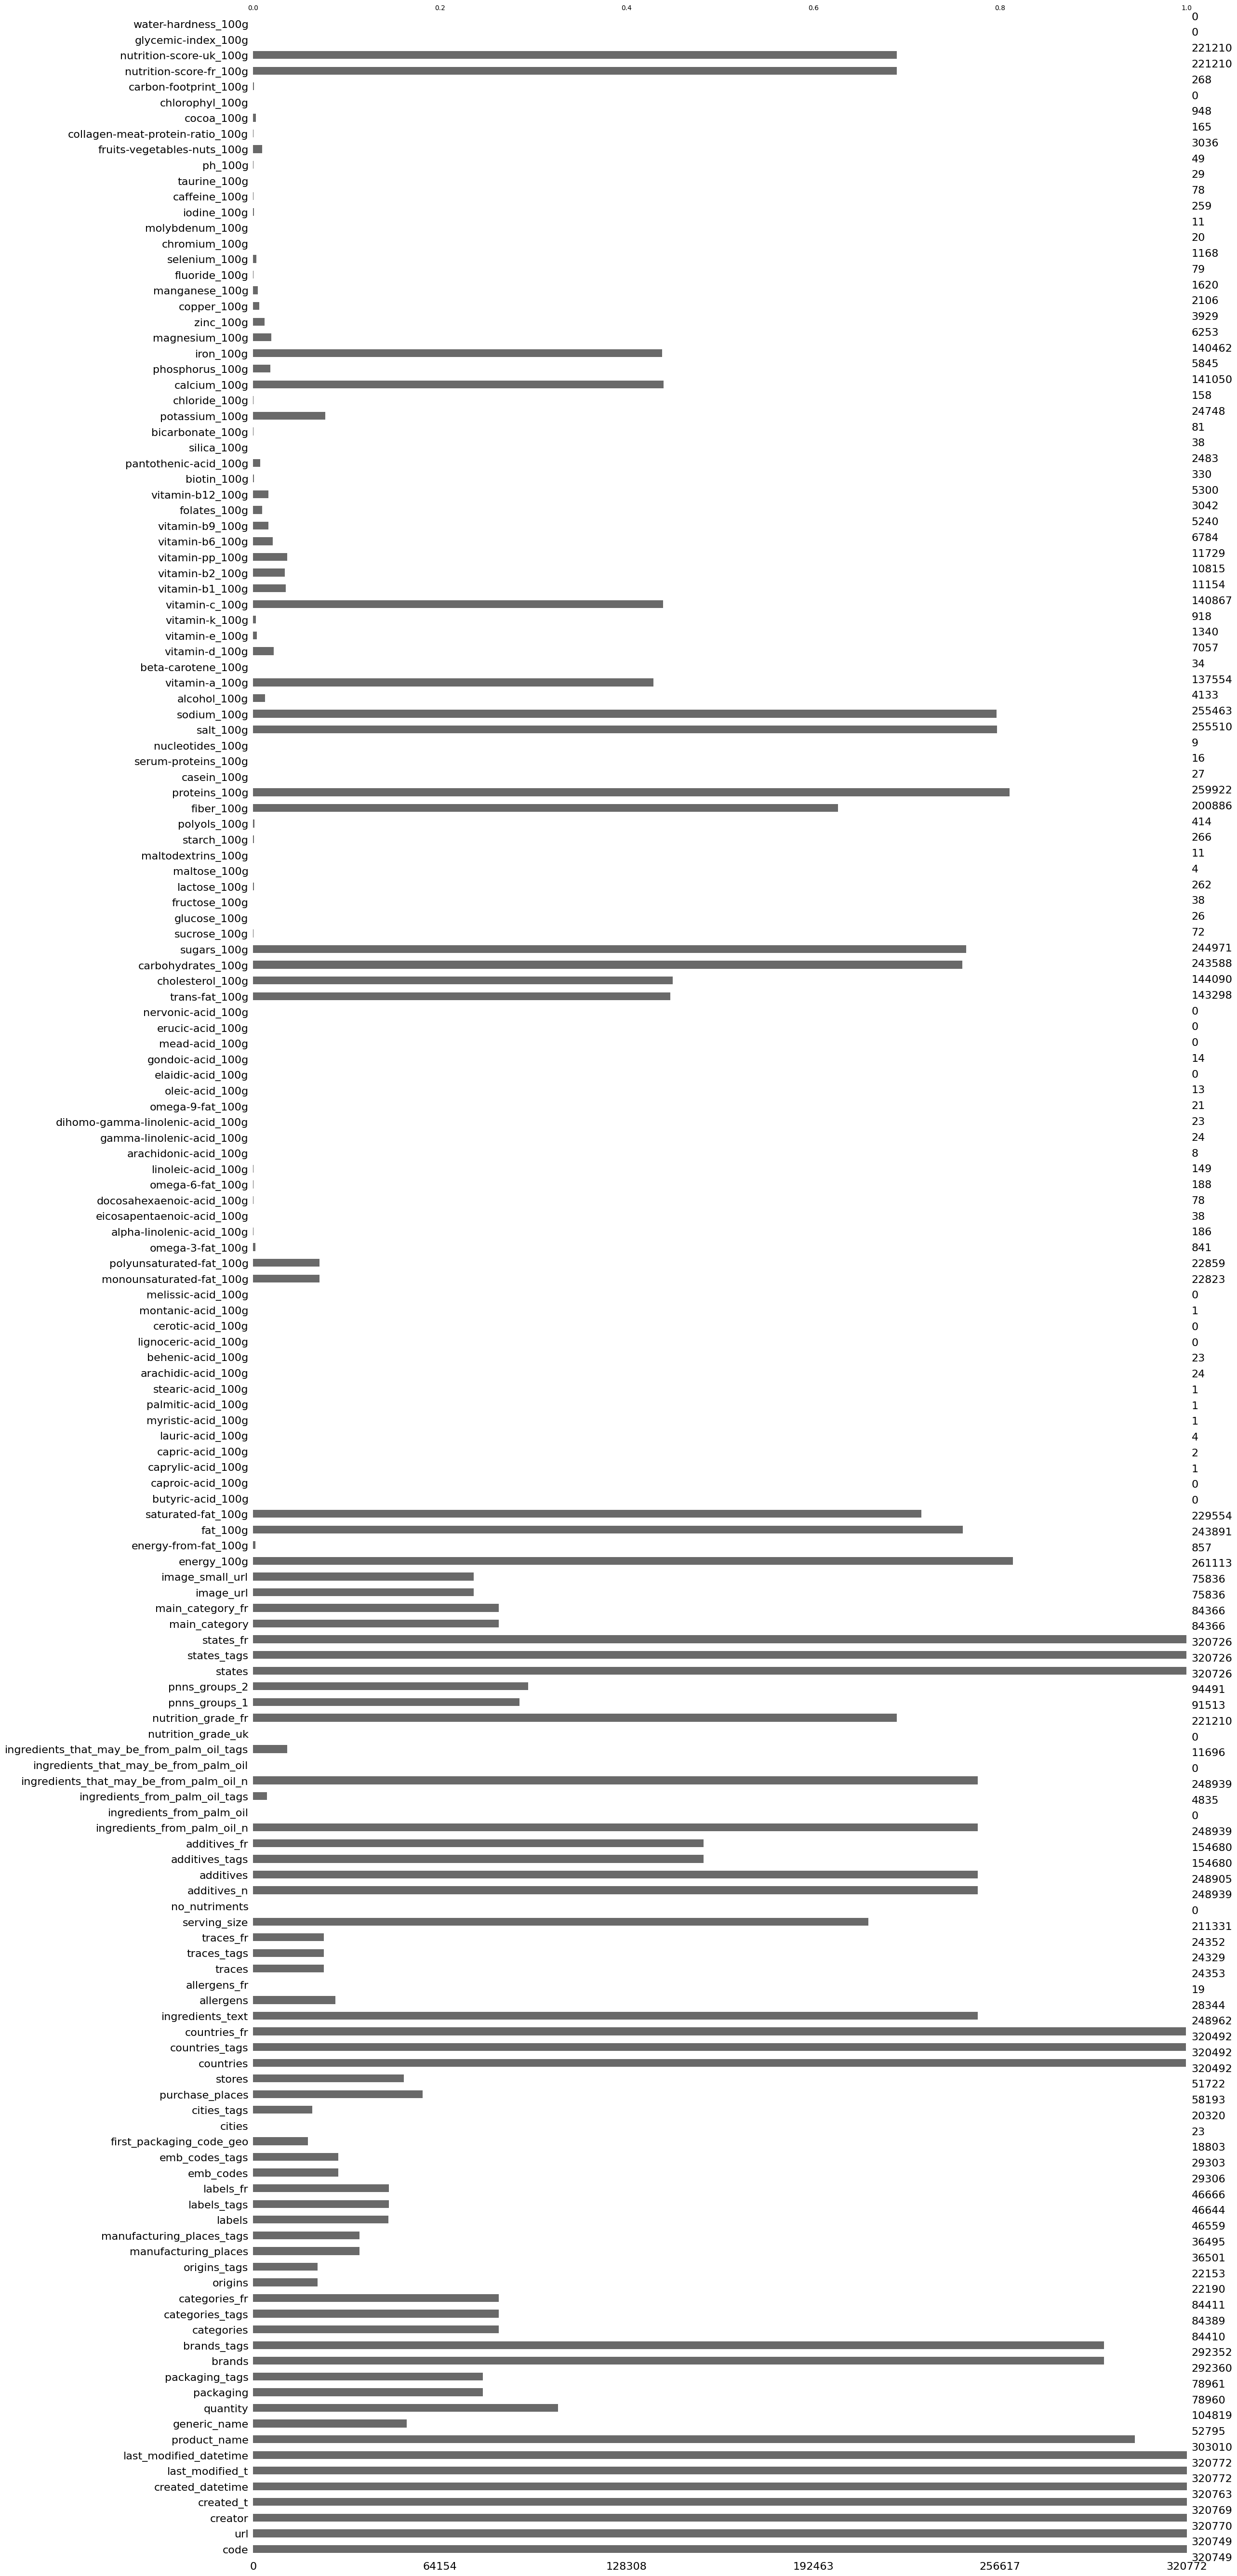

In [24]:
#Existe-t-il des valeurs manquantes dans ce jeu de données ?
display(df.isna().mean())
msno.bar(df)

In [25]:
#Existe-t-il des lignes en double ?
df.duplicated().sum()

0

In [26]:
#Combien y a-t-il de valeurs différentes par colonne ?
df.nunique()

code                       320638
url                        320749
creator                      3535
created_t                  189636
created_datetime           189568
                            ...  
carbon-footprint_100g         202
nutrition-score-fr_100g        55
nutrition-score-uk_100g        55
glycemic-index_100g             0
water-hardness_100g             0
Length: 162, dtype: int64

In [27]:
#Statistiques descriptives
df.describe().T

count        mean         std  \
no_nutriments                                 0.0         NaN         NaN   
additives_n                              248939.0    1.936024    2.502019   
ingredients_from_palm_oil_n              248939.0    0.019659    0.140524   
ingredients_from_palm_oil                     0.0         NaN         NaN   
ingredients_that_may_be_from_palm_oil_n  248939.0    0.055246    0.269207   
...                                           ...         ...         ...   
carbon-footprint_100g                       268.0  341.700764  425.211439   
nutrition-score-fr_100g                  221210.0    9.165535    9.055903   
nutrition-score-uk_100g                  221210.0    9.058049    9.183589   
glycemic-index_100g                           0.0         NaN         NaN   
water-hardness_100g                           0.0         NaN         NaN   

                                          min    25%     50%    75%     max  
no_nutriments                             NaN    NaN     NaN    NaN     NaN  
additives_n                               0.0   0.00    1.00    3.0    31.0  
ingredients_from_palm_oil_n               0.0   0.00    0.00    0.0     2.0  
ingredients_from_palm_oil                 NaN    NaN     NaN    NaN     NaN  
ingredients_that_may_be_from_palm_oil_n   0.0   0.00    0.00    0.0     6.0  
...                                       ...    ...     ...    ...     ...  
carbon-footprint_100g                     0.0  98.75  195.75  383.2  2842.0  
nutrition-score-fr_100g                 -15.0   1.00   10.00   16.0    40.0  
nutrition-score-uk_100g                 -15.0   1.00    9.00   16.0    40.0  
glycemic-index_100g                       NaN    NaN     NaN    NaN     NaN  
water-hardness_100g                       NaN    NaN     NaN    NaN     NaN  

[106 rows x 8 columns]

## II- Sélection des variables pertinentes 

La base de données open source est mise à la disposition de particuliers et d’organisations afin de leur permettre de connaître **la qualité nutritionnelle de produits.** Notre cible va donc être le 'nutrition_grade_fr', calculé à partir du Nutri-Score.

On va se baser sur les données nécessaires à l'établissement du Nutri-Score pour calculer le nutrition-grade. D'après le [site de Santé publique France](file:///C:/Users/Anais/Downloads/FAQ-updatedAlgo-271123.pdf) :

"Le score nutritionnel est calculé à partir des données nutritionnelles figurant sur l'emballage pour 100g/100mL de produit, qui font partie de la déclaration nutritionnelle obligatoire ou sont incluses en tant qu'informations complémentaires conformément à l'article 30 du règlement FIC n° 1169/2011 :
- Énergie (kJ)
- Matières grasses (g)
- Acides gras saturés (g)
- Sucres (g)
- Protéines (g)
- Sel (g)
- Fibres (g)"


In [28]:
#Filtre des variables pertinentes 
colonnes_nutriscore = ['code', 'product_name', 'main_category', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 
                       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
                       'sodium_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']
df = df[colonnes_nutriscore]

print(df.isna().mean())

code                       0.000072
product_name               0.055373
main_category              0.736991
nutrition_grade_fr         0.310382
pnns_groups_1              0.714710
pnns_groups_2              0.705426
energy_100g                0.185986
fat_100g                   0.239675
saturated-fat_100g         0.284370
carbohydrates_100g         0.240620
sugars_100g                0.236308
fiber_100g                 0.373742
proteins_100g              0.189699
salt_100g                  0.203453
sodium_100g                0.203599
nutrition-score-fr_100g    0.310382
nutrition-score-uk_100g    0.310382
dtype: float64


In [29]:
df.describe().T

count         mean          std     min       25%  \
energy_100g              261113.0  1141.914605  6447.154093    0.00  377.0000   
fat_100g                 243891.0    12.730379    17.578747    0.00    0.0000   
saturated-fat_100g       229554.0     5.129932     8.014238    0.00    0.0000   
carbohydrates_100g       243588.0    32.073981    29.731719    0.00    6.0000   
sugars_100g              244971.0    16.003484    22.327284  -17.86    1.3000   
fiber_100g               200886.0     2.862111    12.867578   -6.70    0.0000   
proteins_100g            259922.0     7.075940     8.409054 -800.00    0.7000   
salt_100g                255510.0     2.028624   128.269454    0.00    0.0635   
sodium_100g              255463.0     0.798815    50.504428    0.00    0.0250   
nutrition-score-fr_100g  221210.0     9.165535     9.055903  -15.00    1.0000   
nutrition-score-uk_100g  221210.0     9.058049     9.183589  -15.00    1.0000   

                                50%         75%         max  
energy_100g              1100.00000  1674.00000  3251373.00  
fat_100g                    5.00000    20.00000      714.29  
saturated-fat_100g          1.79000     7.14000      550.00  
carbohydrates_100g         20.60000    58.33000     2916.67  
sugars_100g                 5.71000    24.00000     3520.00  
fiber_100g                  1.50000     3.60000     5380.00  
proteins_100g               4.76000    10.00000      430.00  
salt_100g                   0.58166     1.37414    64312.80  
sodium_100g                 0.22900     0.54100    25320.00  
nutrition-score-fr_100g    10.00000    16.00000       40.00  
nutrition-score-uk_100g     9.00000    16.00000       40.00

## III- Nettoyage des données
### A- Suppression des variables redondantes

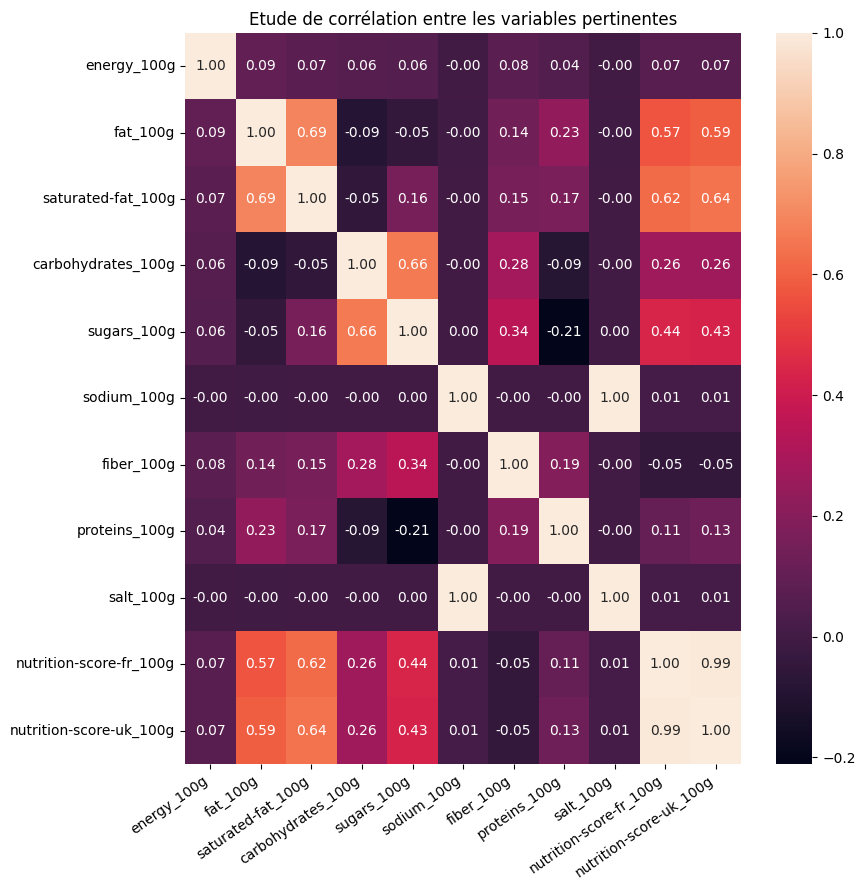

In [30]:
colonnes_correlation = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'sodium_100g',
                        'fiber_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g','nutrition-score-uk_100g']

#Etude de corrélation
plt.figure(figsize = (9,9))
sns.heatmap(df[colonnes_correlation].corr(), annot = True, fmt='.2f')
plt.title('Etude de corrélation entre les variables pertinentes')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

- Les variables 'salt_100g' et 'sodium_100g' sont totalement corrélées. On ne garde que la variable "salt_100g".
- Les variables 'nutrition-score-fr_100g' et 'nutrition-score-uk_100g' sont presque totalement corrélées. On ne garde que la variable 'nutrition-score-fr_100g'.
- Les variables 'saturated-fat_100g' et 'fat_100g' ont une forte corrélation. 'saturated-fat_100g' étant une variable composante de 'fat_100g' et ayant plus de données manquantes, elle est supprimées.
- De même, 'carbohydrates_100g' et 'sugars_100g' ont une forte corrélation. 'sugars_100g' est supprimée.

Avant la suppression de ces colonnes, nous remplacerons les valeurs Nan des colonnes sauvegardées par les valeurs des colonnes que l'on supprime si celle-ci sont remplies.

In [31]:
#Remplacer les valeurs NaN des variables que l'on garde par les valeurs des variables corrélées
columns_to_fillna = {
    'salt_100g': 'sodium_100g',
    'nutrition-score-fr_100g': 'nutrition-score-uk_100g',
    'fat_100g': 'saturated-fat_100g',
    'carbohydrates_100g': 'sugars_100g'
}

for colonne_gardee, colonne_supprimee in columns_to_fillna.items():
    df[colonne_gardee].fillna(df[colonne_supprimee], inplace=True)

In [32]:
# Suppression des colonnes devenues non pertinentes
df.drop(columns=['sodium_100g', 'nutrition-score-uk_100g', 'saturated-fat_100g', 'sugars_100g'], inplace=True)

### B- Suppression des lignes duppliquées

In [33]:
print(df['product_name'].value_counts())

product_name
Ice Cream                                              410
Extra Virgin Olive Oil                                 303
Potato Chips                                           281
Premium Ice Cream                                      226
Tomato Ketchup                                         182
                                                      ... 
Seltzer Water, Orange Cream                              1
Holiday Sanded Trees & Snowmen, Sweet & Chewy Candy      1
Holiday Cinnamon Santas Candy                            1
Ciliegine Fresh Mozzarella                               1
Tomates aux Vermicelles                                  1
Name: count, Length: 221347, dtype: int64


In [34]:
print(df[df['code'].duplicated(keep=False)])

               code                                       product_name  \
6             16117                      Organic Long Grain White Rice   
46            24600                                      Filet de bœuf   
62            31233                         35% Fruit And Fiber Muesli   
155           58001                          Organic Salted Pistachios   
194        20004552                              Côte du Rhône village   
...             ...                                                ...   
280571     54491472                                          Coca-Cola   
280572     54491496                                          Diet coke   
281938  58449410003  Natures Path organic frosted berry toaster pas...   
300376  78742087108  Juice Cocktail Blended With Another Juice From...   
301337     80007838                                                NaN   

            main_category nutrition_grade_fr pnns_groups_1  \
6                     NaN                NaN     

In [35]:
#Mettre toutes les colonnes qualitatives en lettres minuscules
colonne_quali = ['product_name', 'main_category', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2']
df[colonne_quali] = df[colonne_quali].apply(lambda x: x.str.lower())

#Détection des doublons
doublons = df.duplicated(subset=['product_name', 'code', 'energy_100g'], keep='first')
nb_doublons = doublons.sum()
print('Le jeu de données comporte ' + str(nb_doublons) + ' doublons, et possède : ' + str(df.shape[0]) + ' lignes.')

#Suprression des doublons
df = df.drop_duplicates(subset=['product_name', 'code', 'energy_100g'], keep='first')
print('Le jeu de données comporte après traitement ' + str(df.shape[0]) + ' lignes.')

Le jeu de données comporte 34 doublons, et possède : 320772 lignes.
Le jeu de données comporte après traitement 320738 lignes.


### C- Suppression des lignes sans product_name et code

Pour les produits sans code-barres, Open Food Facts attribue un numéro commençant par le préfixe réservé 200. On commence donc par remplacer par NaN les codes commençant par le préfixe 200 avant de supprimer les lignes n'ayant ni product_name ni code

In [36]:
#Remplacer valeur des produits sans code-barres (préfixe 200) par NaN
df['code'] = df['code'].replace(to_replace=r'^200', value=pd.NA, regex=True)

#Détection des lignes n'ayant ni product_name ni code
product_name_nan = df.loc[pd.isnull(df['product_name']) & pd.isnull(df['code'])]
print('Le nombre de produits sans \'product name\' et \'code\' est de : ' + str(len(product_name_nan)))

#Suppression de ces lignes
df.dropna(subset=['product_name', 'code'], inplace=True)

Le nombre de produits sans 'product name' et 'code' est de : 0


### D- Suppression des valeurs aberrantes

#### Observation des données quantitatives avant nettoyage

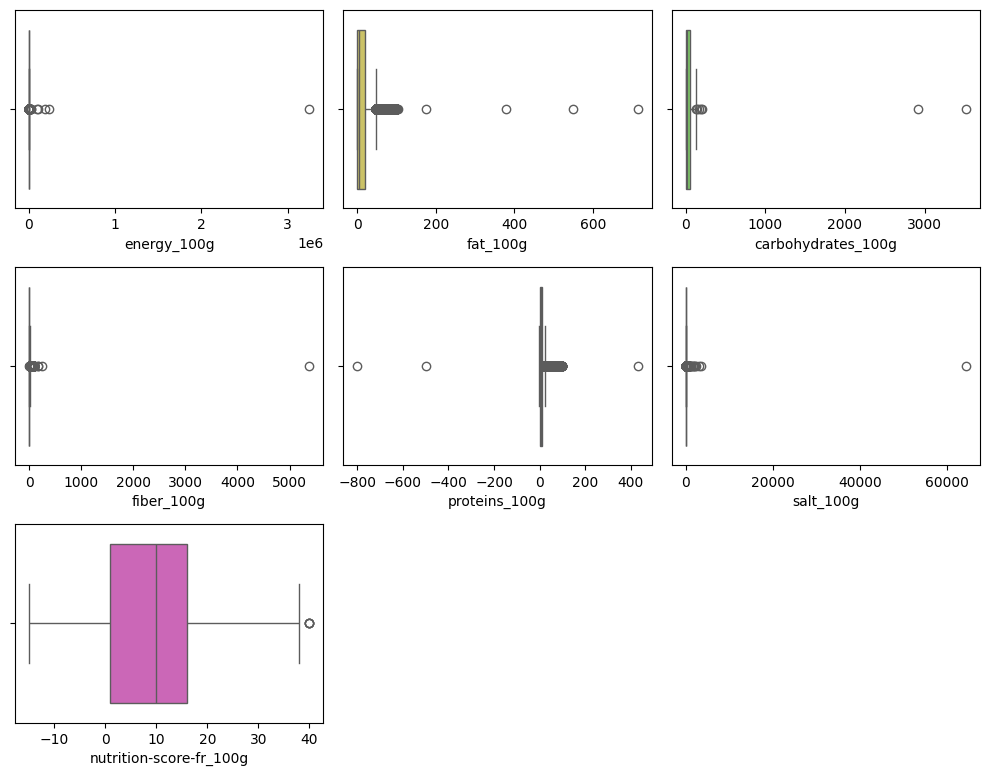

count         mean          std    min       25%  \
energy_100g              257758.0  1140.494941  6484.620335    0.0  373.0000   
fat_100g                 257891.0    12.232097    17.280328    0.0    0.0000   
carbohydrates_100g       257816.0    30.935274    30.344523    0.0    5.0000   
fiber_100g               198575.0     2.863499    12.933956   -6.7    0.0000   
proteins_100g            256591.0     7.074459     8.418896 -800.0    0.7000   
salt_100g                252512.0     2.037959   129.027450    0.0    0.0635   
nutrition-score-fr_100g  218451.0     9.151645     9.052664  -15.0    1.0000   

                               50%         75%         max  
energy_100g              1100.0000  1674.00000  3251373.00  
fat_100g                    4.5000    19.23000      714.29  
carbohydrates_100g         19.0000    57.14000     3520.00  
fiber_100g                  1.5000     3.60000     5380.00  
proteins_100g               4.7600    10.00000      430.00  
salt_100g                   0.5842     1.37922    64312.80  
nutrition-score-fr_100g    10.0000    16.00000       40.00

<Figure size 640x480 with 0 Axes>

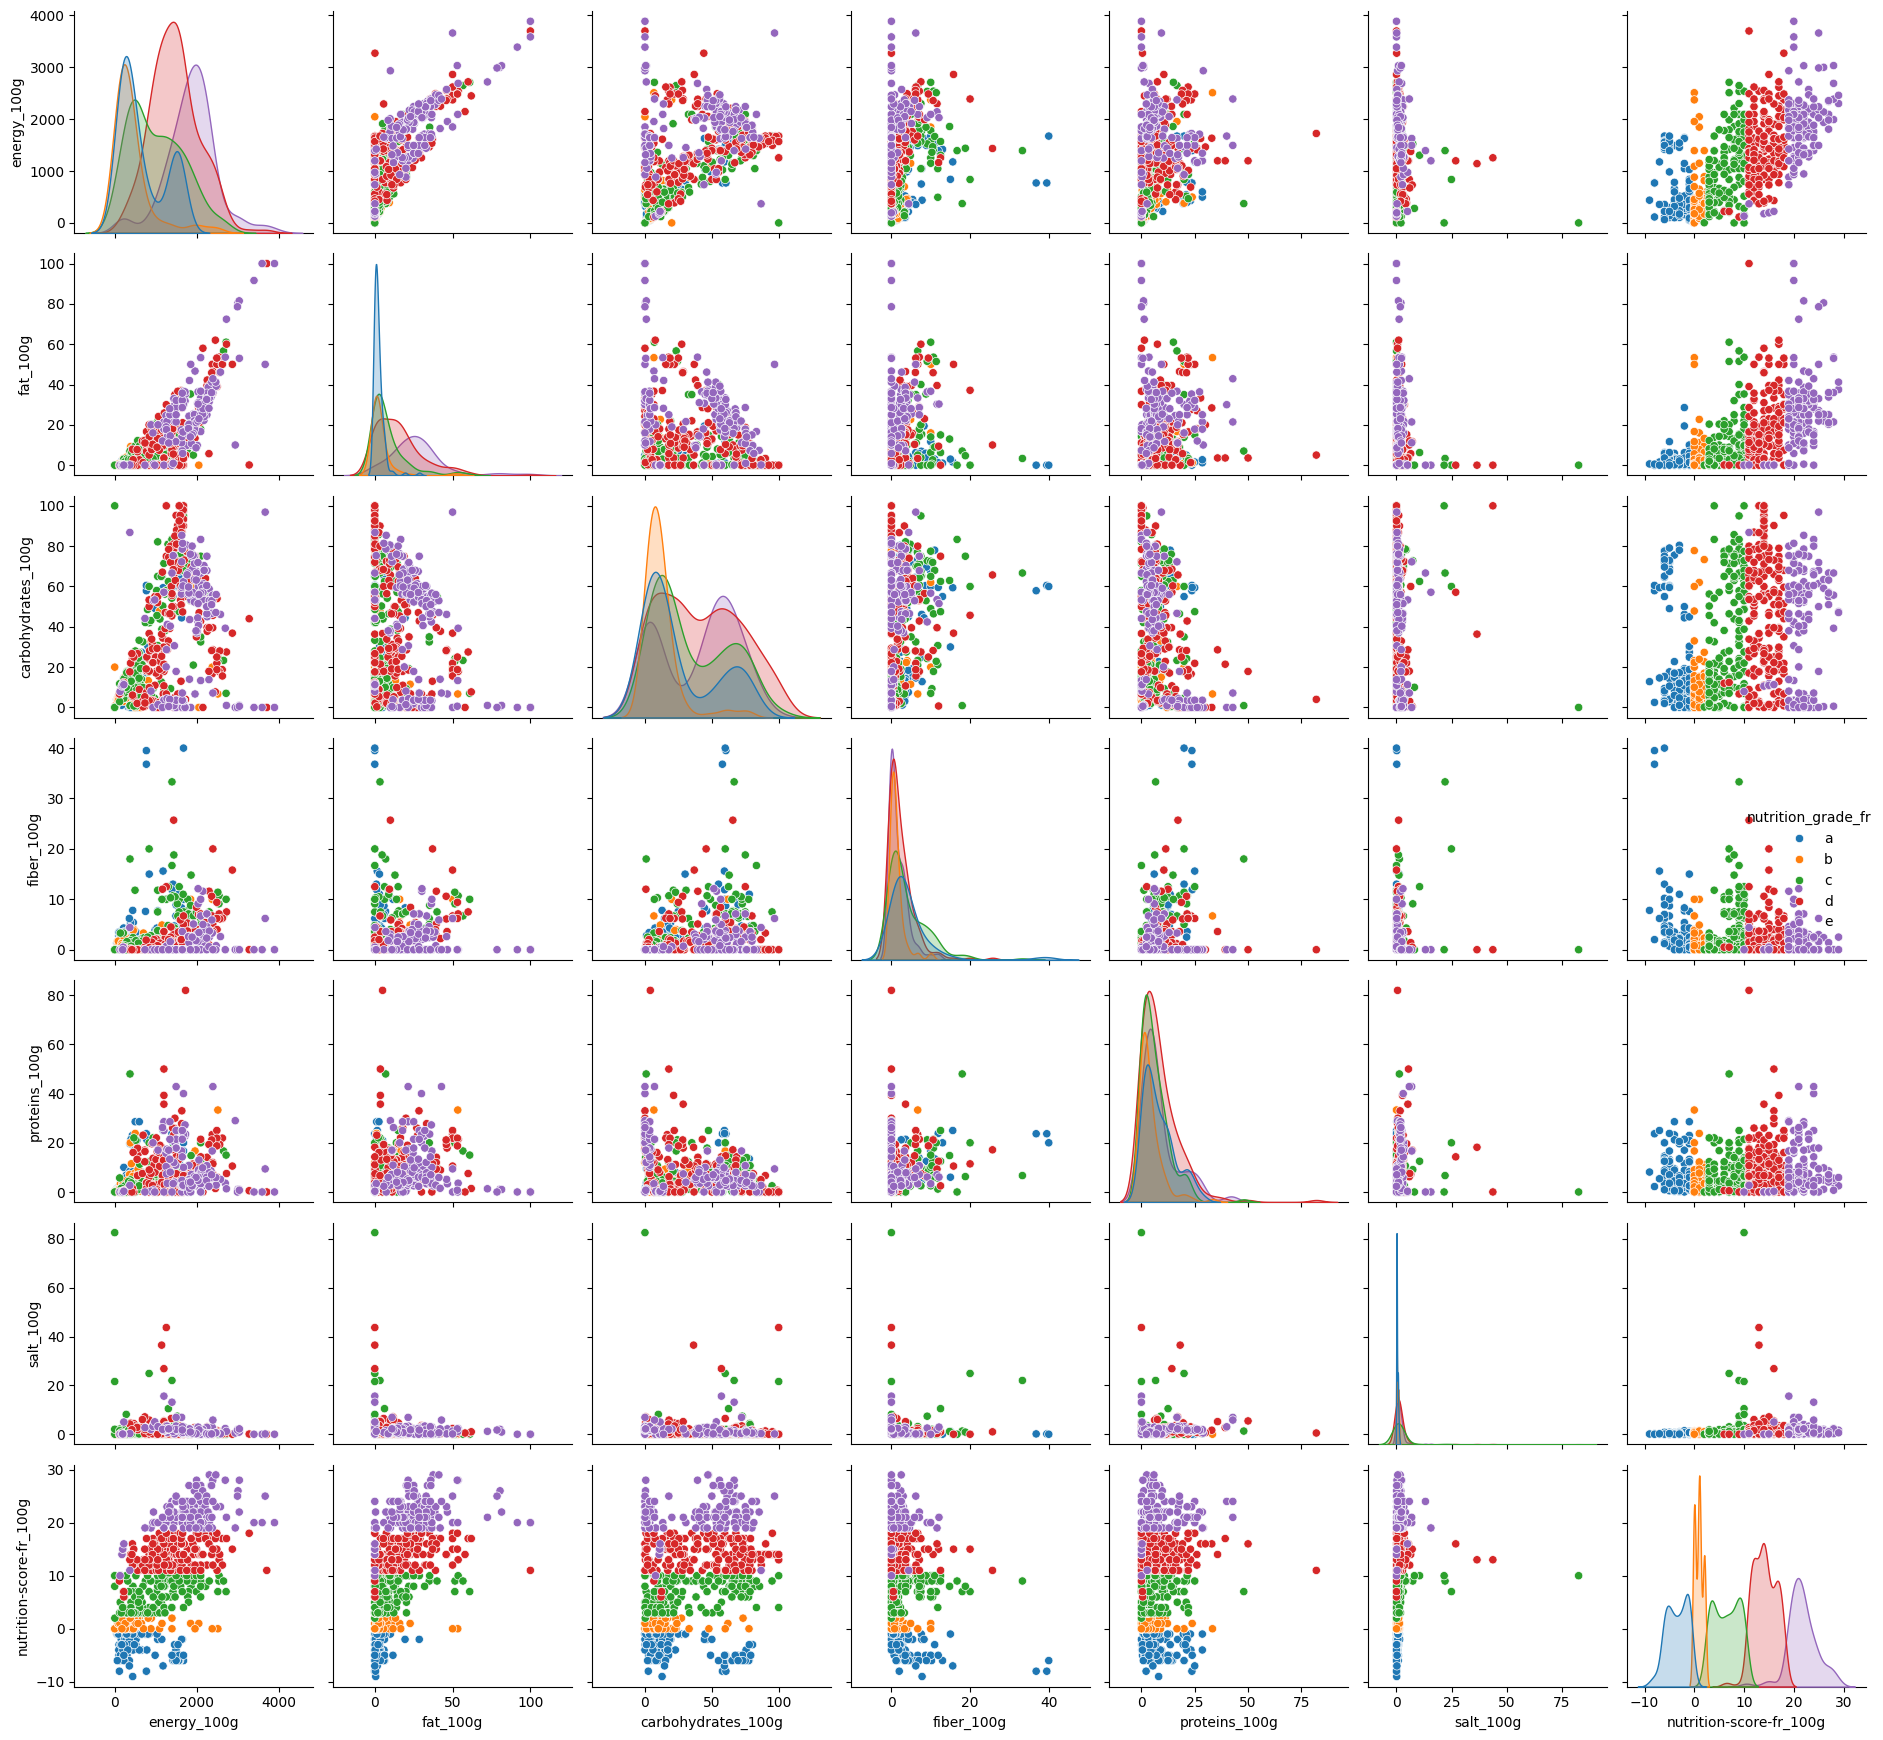

In [37]:
#Sélection des données quantitatives
colonnes_quanti = df.select_dtypes(include='float64')

palette = sns.color_palette("hls", len(colonnes_quanti.columns))

#Représentation graphique des ces données
plt.figure(figsize=(10, 10))
for i, colonne in enumerate(colonnes_quanti.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[colonne], color=palette[i])
plt.tight_layout()
plt.show()

#Représentation de ces données en analyse bivariée
plt.figure()
sns.pairplot(df.sample(1000).sort_values(by='nutrition_grade_fr'), hue='nutrition_grade_fr')
plt.tight_layout()
plt.show

#Statistiques descriptives 
df.describe().T

La représentation graphique en boxplot permet de visualiser la distribition statistique d'un ensemble de données. La longueur de la boîte indique la différence entre le premier et le troisième quartile, et elle est traversé par une ligne qui représente la médiane. Les lignes qui s'étendent en dehors de la boîte, les "moustaches", s'étendent jusqu'à 1.5 fois l'IQR (écart interquartile). Les points allant au délà de ces moustaches sont des valeurs aberrantes. 

On peut donc remarquer que chaque variable possède des valeurs aberrantes que le nettoyage va devoir améliorer.


#### Suppression des valeurs négatives ou supérieures à 100 pour 100g pour chaque nutriment

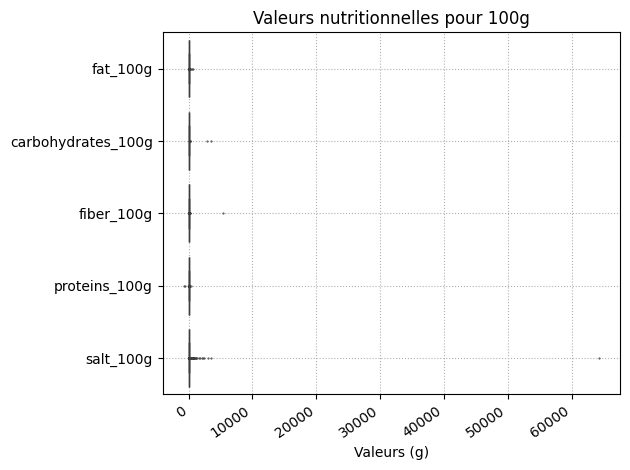

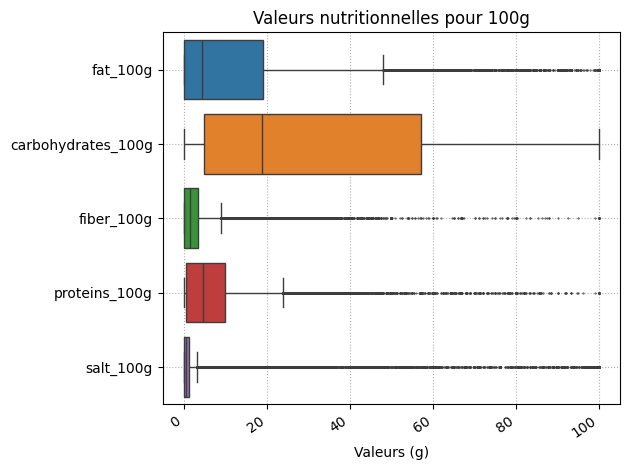

count         mean          std   min       25%  \
energy_100g              257758.0  1140.494941  6484.620335   0.0  373.0000   
fat_100g                 257885.0    12.224527    17.172429   0.0    0.0000   
carbohydrates_100g       257797.0    30.904299    28.994373   0.0    5.0000   
fiber_100g               198570.0     2.833516     4.591625   0.0    0.0000   
proteins_100g            256587.0     7.077974     8.163373   0.0    0.7000   
salt_100g                252356.0     1.593413     6.261484   0.0    0.0635   
nutrition-score-fr_100g  218451.0     9.151645     9.052664 -15.0    1.0000   

                               50%         75%        max  
energy_100g              1100.0000  1674.00000  3251373.0  
fat_100g                    4.5000    19.23000      100.0  
carbohydrates_100g         19.0000    57.14000      100.0  
fiber_100g                  1.5000     3.60000      100.0  
proteins_100g               4.7600    10.00000      100.0  
salt_100g                   0.5842     1.37414      100.0  
nutrition-score-fr_100g    10.0000    16.00000       40.0

In [38]:
#Sélection des variables nutritionnelles (sauf 'energy_100g')
colonnes_100g = ['fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']

# Représentation graphique de la distribution des valeurs avant nettoyage
plt.figure()
sns.boxplot(data=df[colonnes_100g], orient = 'h', fliersize = 0.5)
plt.grid(True, linestyle=':')
plt.title('Valeurs nutritionnelles pour 100g')
plt.xlabel('Valeurs (g)')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

#Remplacer les valeurs >100 ou <0 dans colonnes "_100g" par nan
for colonne in colonnes_100g:
    df[colonne] = np.where((df[colonne] > 100) | (df[colonne] < 0), np.nan, df[colonne])

# Représentation graphique de la distribution des valeurs après nettoyage
plt.figure()
sns.boxplot(data=df[colonnes_100g], orient = 'h', fliersize = 0.5)
plt.grid(True, linestyle=':')
plt.title('Valeurs nutritionnelles pour 100g')
plt.xlabel('Valeurs (g)')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

df.describe().T

#### Suppression des valeurs nutritionelles aberrantes
En tenant compte du contexte métier, la valeur .max limite pour chaque composant nutritionel pour 100g est la suivante :
- **Max de energy_100g** : 3700 kj, soit environ 900kcal, ce qui correspond aux graisses animales, au premier rang des aliments les plus caloriques
- **Max de salt_100g** : le sel avec 100g
- **Max de fat_100g** : l'huile avec 100g
- **Max de carbohydrates_100g** : le sucre avec 100g 
- **Max de proteins_100g** : la spiruline avec 57g 
- **Max de fiber_100g** : les graines de chia avec 38g



#### Suppression des valeurs aberrantes de la variable energy_100g (supérieur à 3700Kj)

In [39]:
#Sélection des valeurs supérieures à 3700Kj
energy_aberrante = df[df['energy_100g'] > 3700]
print('Le nombre de valeurs aberrantes de la variable energy_100g est de : ' + str(len(energy_aberrante)) + ' valeurs')

#Remplacement des valeurs sélectionnées par nan
df.loc[df['energy_100g'] > 3700, 'energy_100g'] = np.nan

Le nombre de valeurs aberrantes de la variable energy_100g est de : 624 valeurs


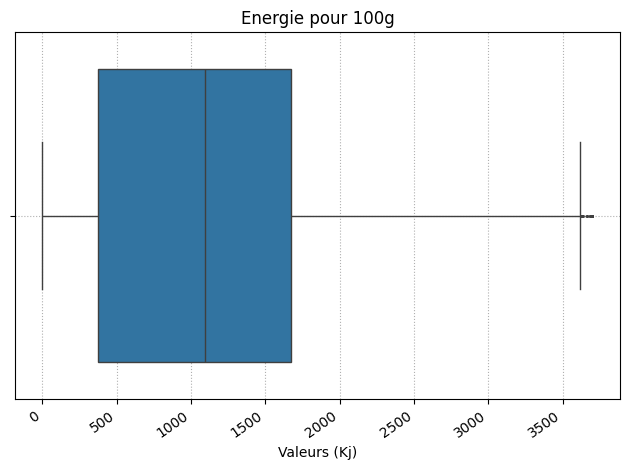

count         mean         std   min       25%  \
energy_100g              257134.0  1117.774724  788.011673   0.0  372.0000   
fat_100g                 257885.0    12.224527   17.172429   0.0    0.0000   
carbohydrates_100g       257797.0    30.904299   28.994373   0.0    5.0000   
fiber_100g               198570.0     2.833516    4.591625   0.0    0.0000   
proteins_100g            256587.0     7.077974    8.163373   0.0    0.7000   
salt_100g                252356.0     1.593413    6.261484   0.0    0.0635   
nutrition-score-fr_100g  218451.0     9.151645    9.052664 -15.0    1.0000   

                               50%         75%     max  
energy_100g              1096.0000  1674.00000  3700.0  
fat_100g                    4.5000    19.23000   100.0  
carbohydrates_100g         19.0000    57.14000   100.0  
fiber_100g                  1.5000     3.60000   100.0  
proteins_100g               4.7600    10.00000   100.0  
salt_100g                   0.5842     1.37414   100.0  
nutrition-score-fr_100g    10.0000    16.00000    40.0

In [40]:
#Représentation graphique de la variable 'energy_100g' après nettoyage
plt.figure()
sns.boxplot(data=df['energy_100g'], orient = 'h', fliersize = 0.5)
plt.grid(True, linestyle=':')
plt.title('Energie pour 100g')
plt.xlabel('Valeurs (Kj)')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

df.describe().T

In [41]:
#Détection des valeurs aberrantes restantes grâce à la méthode IQR
Q1 = df['energy_100g'].quantile(0.25)
Q3 = df['energy_100g'].quantile(0.75)
IQR = Q3 - Q1
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR
energy_aberrante = df.loc[(df['energy_100g'] < borne_inf) | (df['energy_100g'] > borne_sup)]

print("Lignes avec valeurs aberrantes :\n", energy_aberrante)

Lignes avec valeurs aberrantes :
                  code                                       product_name  \
10369     12005000541              1-2-3, cholesterol free vegetable oil   
14988     18959003478  northernlights pizza company's, amazing sauce,...   
19510     22174018094               cajun injector, soybean & peanut oil   
21094     24094300037            l'olio de cecco, extra virgin olive oil   
21095     24094480012                             extra virgin olive oil   
...               ...                                                ...   
315570  8718182611298                                          kokosolie   
316288  8801007440750                                 premium sesame oil   
319806  9312628260010                                        melrose mct   
320269  9348603002870                                  lemon coconut oil   
320270  9348603002887                                        coconut oil   

            main_category nutrition_grade_fr   pnns_g

La plupart des valeurs considérées comme aberrantes par la méthode IQR sont des huiles. Ce ne sont pas des valeurs aberrantes mais atypiques. On ne prend donc pas en compte la suppression des valeurs aberrantes en fonction de cette méthode.

#### Suppression des valeurs aberrantes de la variable 'protein_100g'

In [42]:
proteins_aberrant = df[df['proteins_100g'] > 60]
print('Le nombre de valeurs aberrantes pour la variable \'proteins_aberrant\' est de ' +
      str(len(proteins_aberrant)) + ' valeurs')

df.loc[df['proteins_100g'] > 60, 'proteins_100g'] = np.nan

Le nombre de valeurs aberrantes pour la variable 'proteins_aberrant' est de 283 valeurs


#### Suppression des valeurs aberrantes de la variable 'fiber_100g'

In [43]:
fiber_aberrant = df[df['fiber_100g'] > 45]
print('Le nombre de valeurs aberrantes pour la variable \'fiber_aberrant\' est de ' +
      str(len(fiber_aberrant)) + ' valeurs')

df.loc[df['fiber_100g'] > 45, 'fiber_100g'] = np.nan

Le nombre de valeurs aberrantes pour la variable 'fiber_aberrant' est de 170 valeurs


#### Suppression des lignes dont la valeur nutritionnelle totale est supérieure à 105g

In [44]:
df['somme_valeur_nutri'] = df[colonnes_100g].sum(axis=1)
somme_aberrante = df.loc[df['somme_valeur_nutri'] > 105]
print('Le nombre de valeurs aberrantes pour la variable \'sommme_aberrante\' est de ' +
      str(len(somme_aberrante)) + ' valeurs. Les lignes sont supprimées')
df = df.loc[df['somme_valeur_nutri'] <= 105]

Le nombre de valeurs aberrantes pour la variable 'sommme_aberrante' est de 6891 valeurs. Les lignes sont supprimées


#### Suppression des lignes sans valeur nutritionnelle
Les lignes sans valeur nutritionnelle disponible ne vont pas pouvoir être imputées. Ces lignes doivent être supprimées.

In [45]:
lignes_que_nan = df[colonnes_100g].isna().all(axis=1)
print("Lignes à supprimer : ", lignes_que_nan.sum())
print(df[lignes_que_nan])

df.dropna(subset=colonnes_100g, how='all', inplace=True)
print(df.shape)

Lignes à supprimer :  44126
                 code                                       product_name  \
0                3087                                 farine de blé noir   
46              24600                                      filet de bœuf   
47              27083                marks % spencer 2 blueberry muffins   
136             39259                                            twix x2   
153             50913  m&s extrenely chocolatey milk, dark & white ch...   
...               ...                                                ...   
320764           9918                         cheese cake thé vert, yuzu   
320765  9935010000003                                     rillette d'oie   
320767  9948282780603                                  tomato & ricotta    
320769  9970229501521                                            乐吧泡菜味薯片   
320770  9980282863788                           tomates aux vermicelles    

             main_category nutrition_grade_fr   pnns_groups

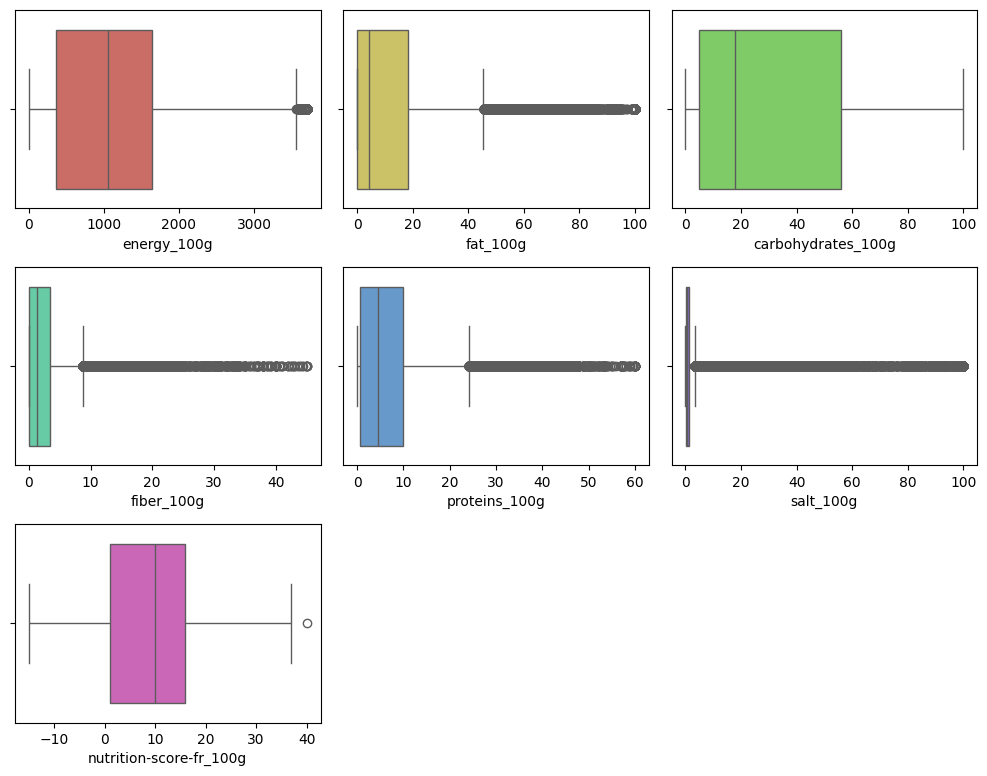

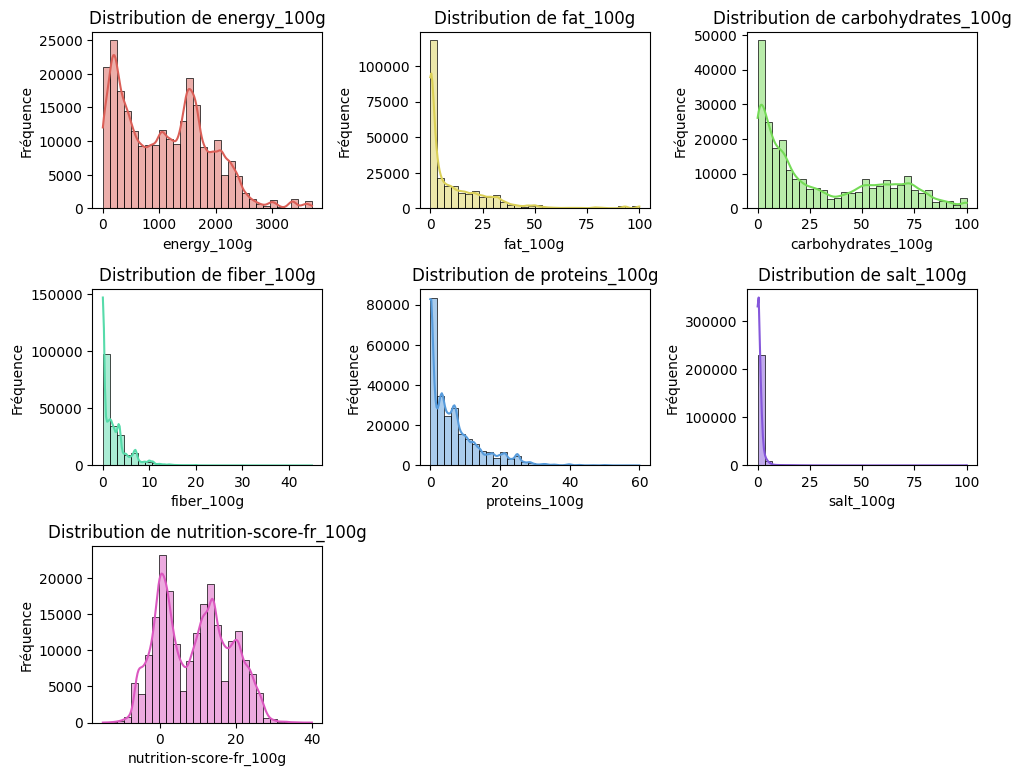

In [46]:
# Représentation graphique de la distribution des données 
plt.figure(figsize=(10, 10))
for i, colonne in enumerate(colonnes_quanti.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[colonne], color=palette[i])
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
for i, colonne in enumerate(colonnes_quanti.columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[colonne], kde=True, bins=30, color=palette[i])
    plt.title(f'Distribution de {colonne}')
    plt.xlabel(colonne)
    plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

## IV- Imputation des données manquantes

code                       0.000000
product_name               0.000000
main_category              0.748364
nutrition_grade_fr         0.159437
pnns_groups_1              0.732512
pnns_groups_2              0.731829
energy_100g                0.007962
fat_100g                   0.003782
carbohydrates_100g         0.004163
fiber_100g                 0.239154
proteins_100g              0.009970
salt_100g                  0.025544
nutrition-score-fr_100g    0.159437
somme_valeur_nutri         0.000000
dtype: float64
                            count         mean         std   min       25%  \
energy_100g              249949.0  1094.050357  779.048423   0.0  364.0000   
fat_100g                 251002.0    11.802034   16.866370   0.0    0.0000   
carbohydrates_100g       250906.0    30.253930   28.877396   0.0    4.9000   
fiber_100g               191699.0     2.405061    3.358684   0.0    0.0000   
proteins_100g            249443.0     6.797095    7.692841   0.0    0.6000   
salt_100g    

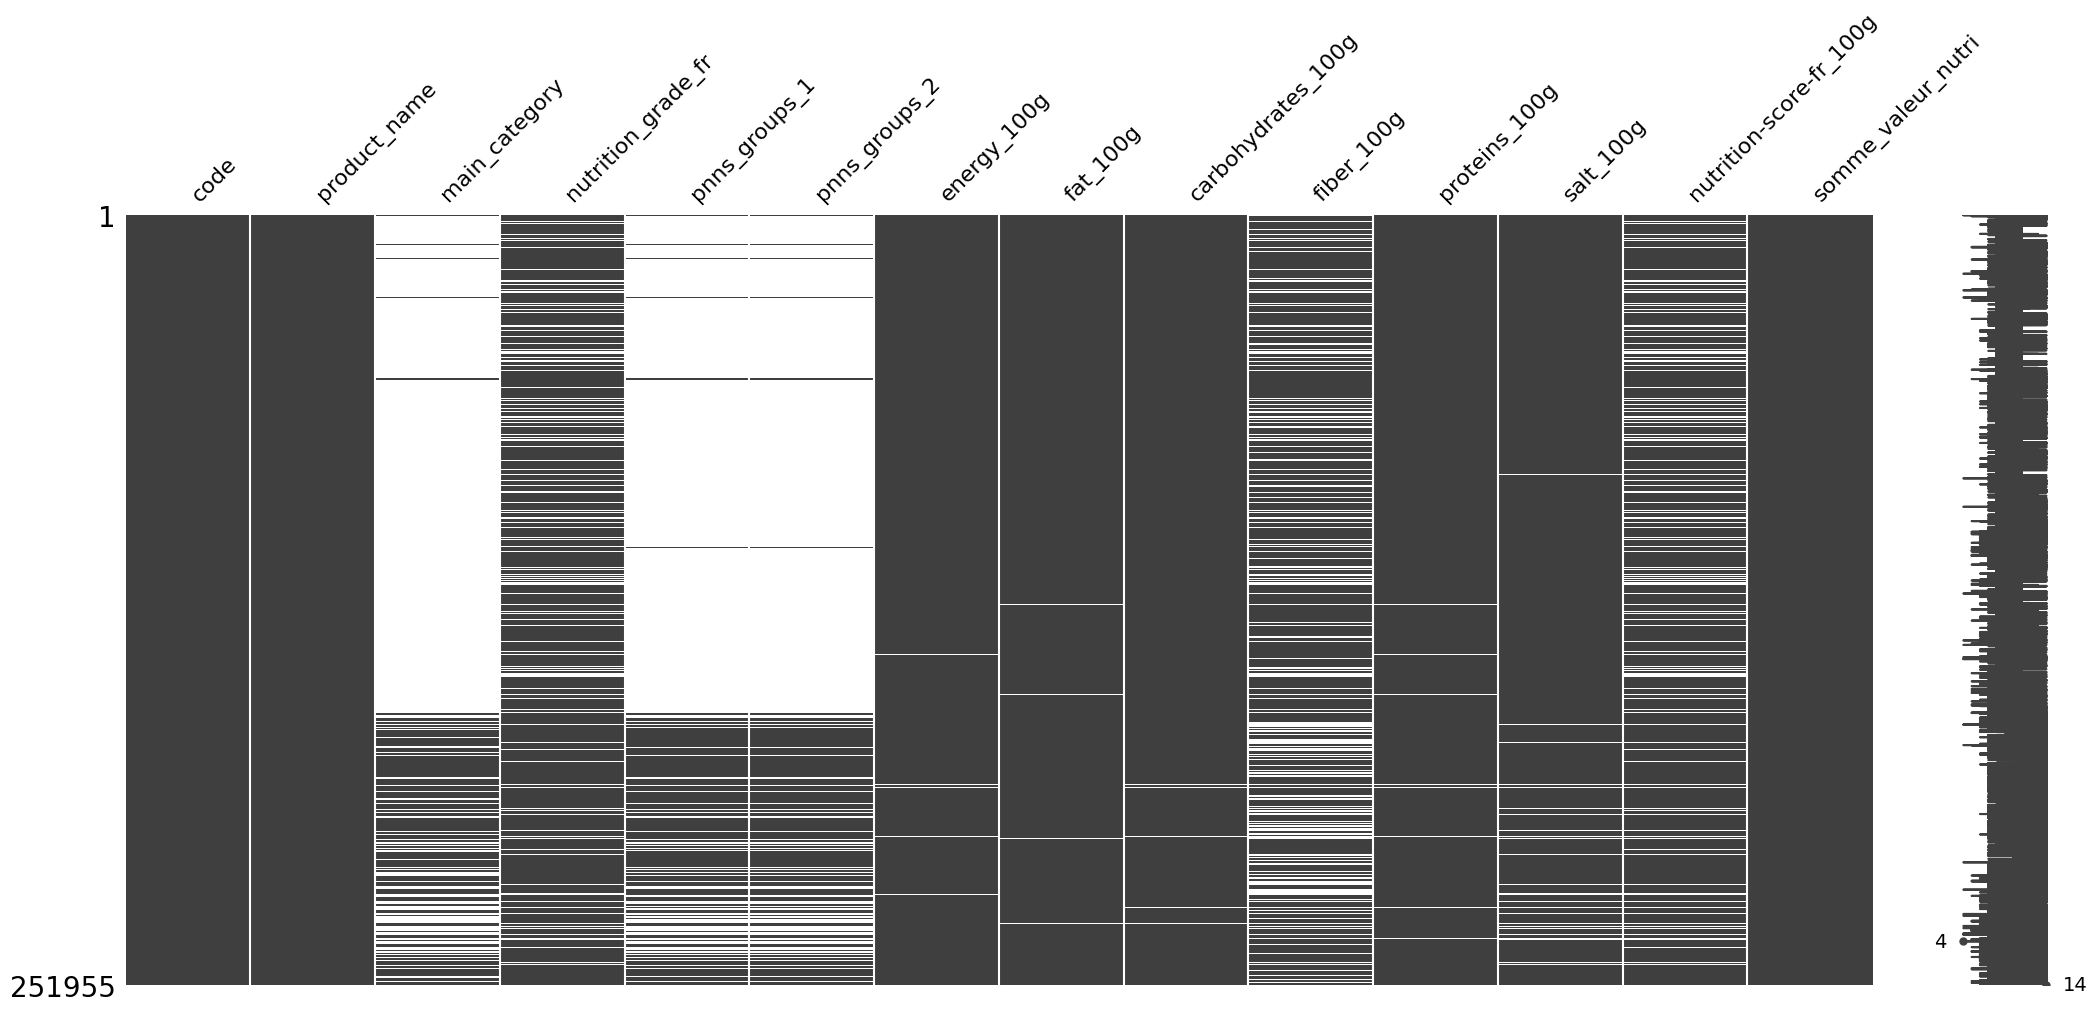

In [47]:

colonnes_correlation = ['energy_100g', 'fat_100g', 'carbohydrates_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g']

#Moyenne et représentation des valeurs manquantes
print(df.isna().mean())
msno.matrix(df)
print(df.describe().T)

### A- Imputation par 0
Si la somme des valeurs nutritionnelles des lignes est égale à 100g, alors les valeurs nan de la lignes doivent être égale à 0

In [48]:
# Sélectionner les lignes où 'somme_valeur_nutri' >= 100
somme_egale_100 = df['somme_valeur_nutri'] >= 100

# Remplacer les valeurs NaN par 0 
df.loc[somme_egale_100, colonnes_100g] = df.loc[somme_egale_100, colonnes_100g].fillna(0)

print(df.loc[df['somme_valeur_nutri'] >= 100])
print(df.isna().mean())

                 code                                       product_name  \
1                4530                     banana chips sweetened (whole)   
2                4559                                            peanuts   
3               16087                             organic salted nut mix   
5               16100                  breadshop honey gone nuts granola   
7               16124                                     organic muesli   
...               ...                                                ...   
320457  9421902208812                                              snack   
320618  9556092706166                                 jeenys palm sugar    
320619  9556107022601  goldwilly, original instant chrysanthemum tea,...   
320646  9556390158162                              lee, special crackers   
320647  9556390178160                                     sugar crackers   

           main_category nutrition_grade_fr pnns_groups_1 pnns_groups_2  \
1           

### B- Imputation par la médiane en fonction des variables qualitatives
La médiane est un meilleur choix que la moyenne car elle est moins sensible aux outliers

code                       0.000000
product_name               0.000000
main_category              0.000000
nutrition_grade_fr         0.159437
pnns_groups_1              0.000000
pnns_groups_2              0.000000
energy_100g                0.007962
fat_100g                   0.001500
carbohydrates_100g         0.000881
fiber_100g                 0.133234
proteins_100g              0.005116
salt_100g                  0.009418
nutrition-score-fr_100g    0.159437
somme_valeur_nutri         0.000000
dtype: float64
Axes(0.125,0.11;0.775x0.77)


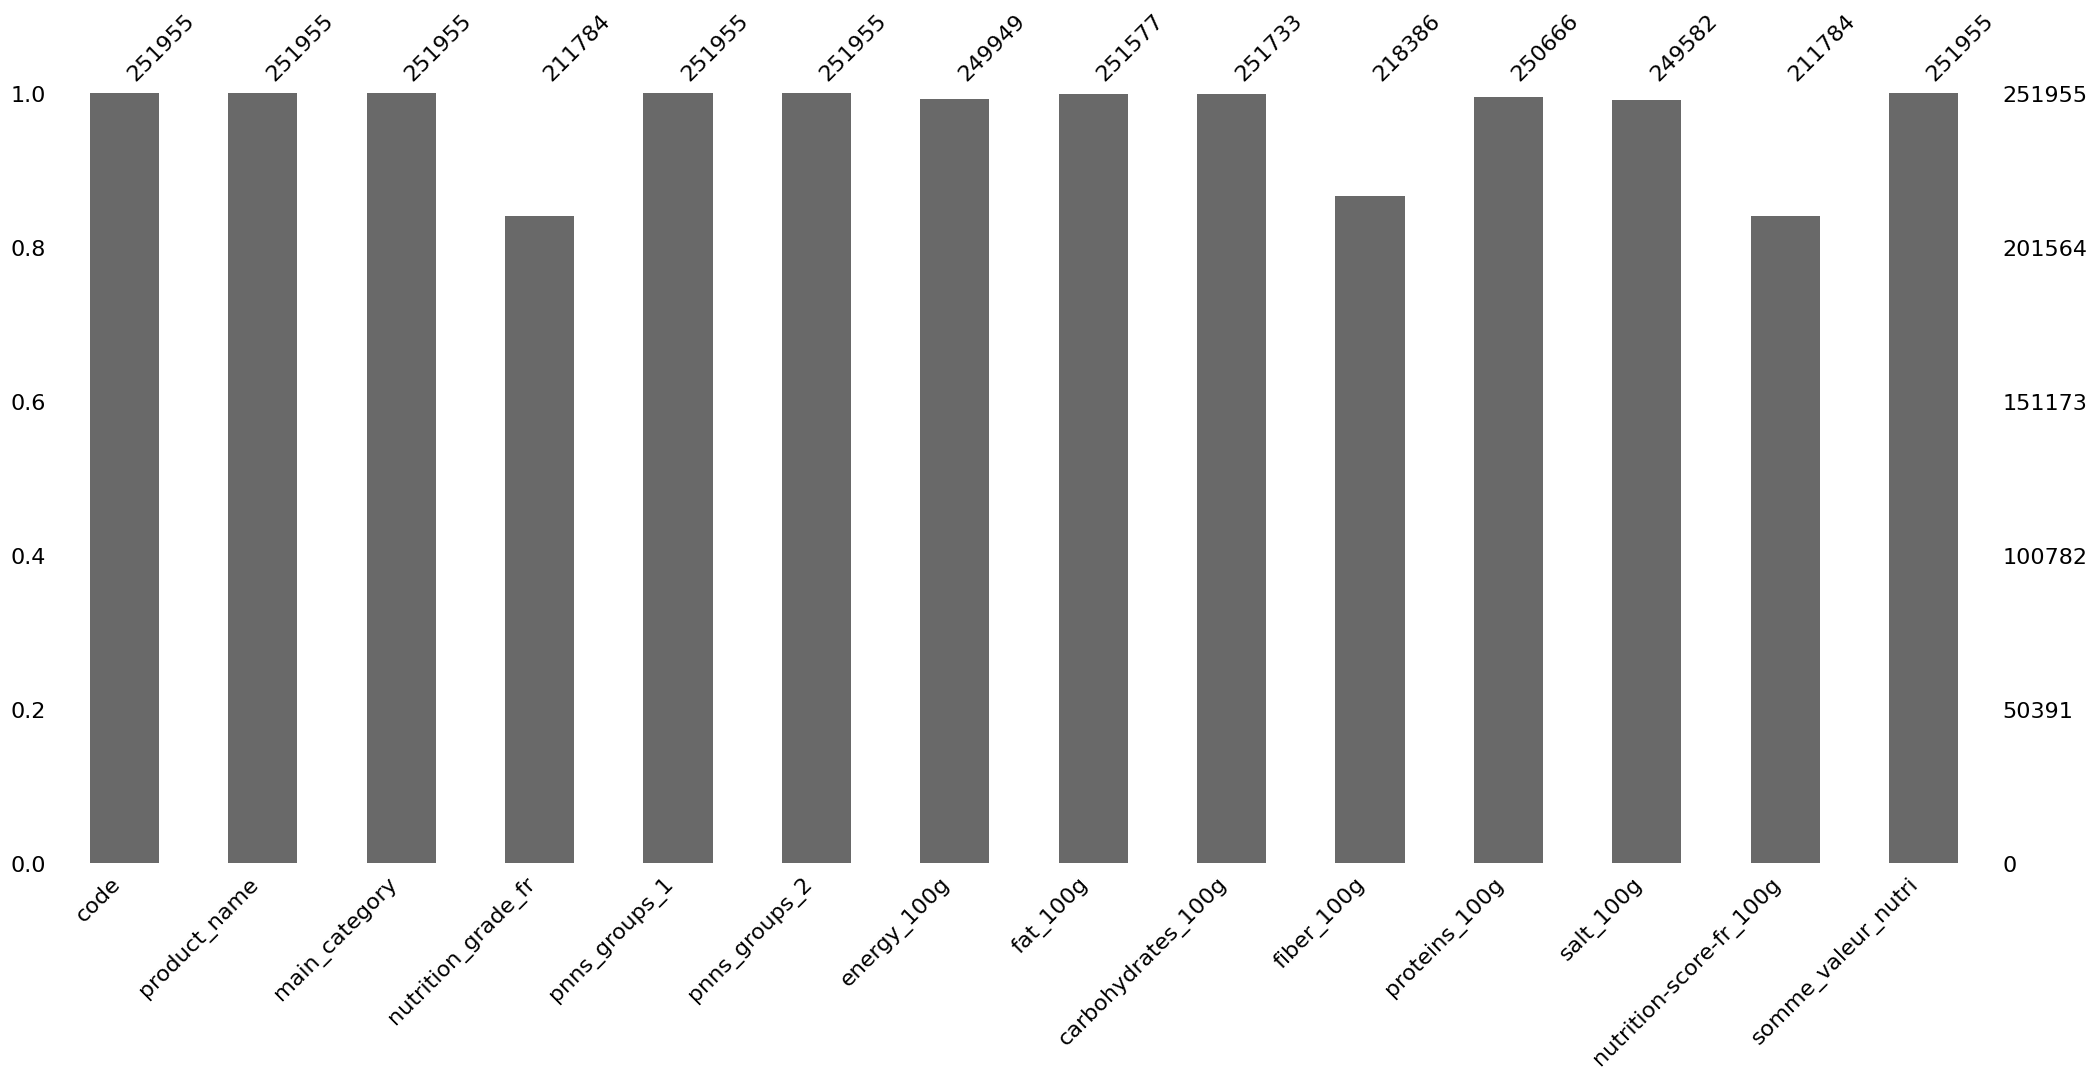

In [49]:
for col in colonnes_100g:
    df[col].fillna(df.groupby(['pnns_groups_1', 'pnns_groups_2', 'main_category'])[col].transform('median'), inplace=True)

#Remplacer valeurs NaN par "unknown" dans les variables qualitatives
df['pnns_groups_1'] = df['pnns_groups_1'].fillna('unknown')
df['pnns_groups_2'] = df['pnns_groups_2'].fillna('unknown')
df['main_category'] = df['main_category'].fillna('unknown')

print(df.isna().mean())
print(msno.bar(df))

### C- Imputation KNN 

In [50]:
# Sélection des colonnes de type float64
float_columns = df.select_dtypes(include='float64').columns

# Imputation KNN
imputation_knn = KNNImputer(n_neighbors=5)
df[float_columns] = pd.DataFrame(imputation_knn.fit_transform(df[float_columns]), columns=float_columns, index=df.index)

In [51]:
# Vérification des valeurs manquantes après imputation
print(df.isna().mean())

code                       0.000000
product_name               0.000000
main_category              0.000000
nutrition_grade_fr         0.159437
pnns_groups_1              0.000000
pnns_groups_2              0.000000
energy_100g                0.000000
fat_100g                   0.000000
carbohydrates_100g         0.000000
fiber_100g                 0.000000
proteins_100g              0.000000
salt_100g                  0.000000
nutrition-score-fr_100g    0.000000
somme_valeur_nutri         0.000000
dtype: float64


### D- Nutrition_grade_fr

D'après Santé publique France : 
"The Nutri-Score logo is attributed based on the nutritional score calculated :
- Min à 0 : Categorie A
- 1 à 2 : Categorie B
- 3 à 10 : Categorie C
- 11 à 18 : Categorie D
- 19 à max : Categorie E"

Nous allons donc remplir les valeurs Nan de 'nutrition_grade_fr' en se basant sur la variable 'nutrition-score-fr_100g'

In [52]:
# Associer intervalle de valeur du nutriscore à une catégorie de nutri-score
conditions = [
    (df['nutrition-score-fr_100g'] < 0.5),
    ((df['nutrition-score-fr_100g'] >= 0.5) & (df['nutrition-score-fr_100g'] <2.5)),
    ((df['nutrition-score-fr_100g'] >= 2.5) & (df['nutrition-score-fr_100g'] < 10.5)),
    ((df['nutrition-score-fr_100g'] >= 10.5) & (df['nutrition-score-fr_100g'] < 18.5)),
    (df['nutrition-score-fr_100g'] >= 18.5)
]

# Les valeurs catégoriques
values = ['a', 'b', 'c', 'd', 'e']

df['nutrition_grade_fr'] = np.select(conditions, values, default=df['nutrition_grade_fr'])

In [53]:
# Définir l'ordre des rangs de la variable 'nutrition_grade_fr'
nutrition_grade_order = ['a', 'b', 'c', 'd', 'e']

# Convertir la colonne nutrition_grade_fr en une variable catégorique avec un ordre spécifié
df['nutrition_grade_fr'] = df['nutrition_grade_fr'].astype(CategoricalDtype(categories=nutrition_grade_order, ordered=True))

code                       0.0
product_name               0.0
main_category              0.0
nutrition_grade_fr         0.0
pnns_groups_1              0.0
pnns_groups_2              0.0
energy_100g                0.0
fat_100g                   0.0
carbohydrates_100g         0.0
fiber_100g                 0.0
proteins_100g              0.0
salt_100g                  0.0
nutrition-score-fr_100g    0.0
somme_valeur_nutri         0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
Index: 251955 entries, 1 to 320771
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   code                     251955 non-null  object  
 1   product_name             251955 non-null  object  
 2   main_category            251955 non-null  object  
 3   nutrition_grade_fr       251955 non-null  category
 4   pnns_groups_1            251955 non-null  object  
 5   pnns_groups_2            251955 non-null  object

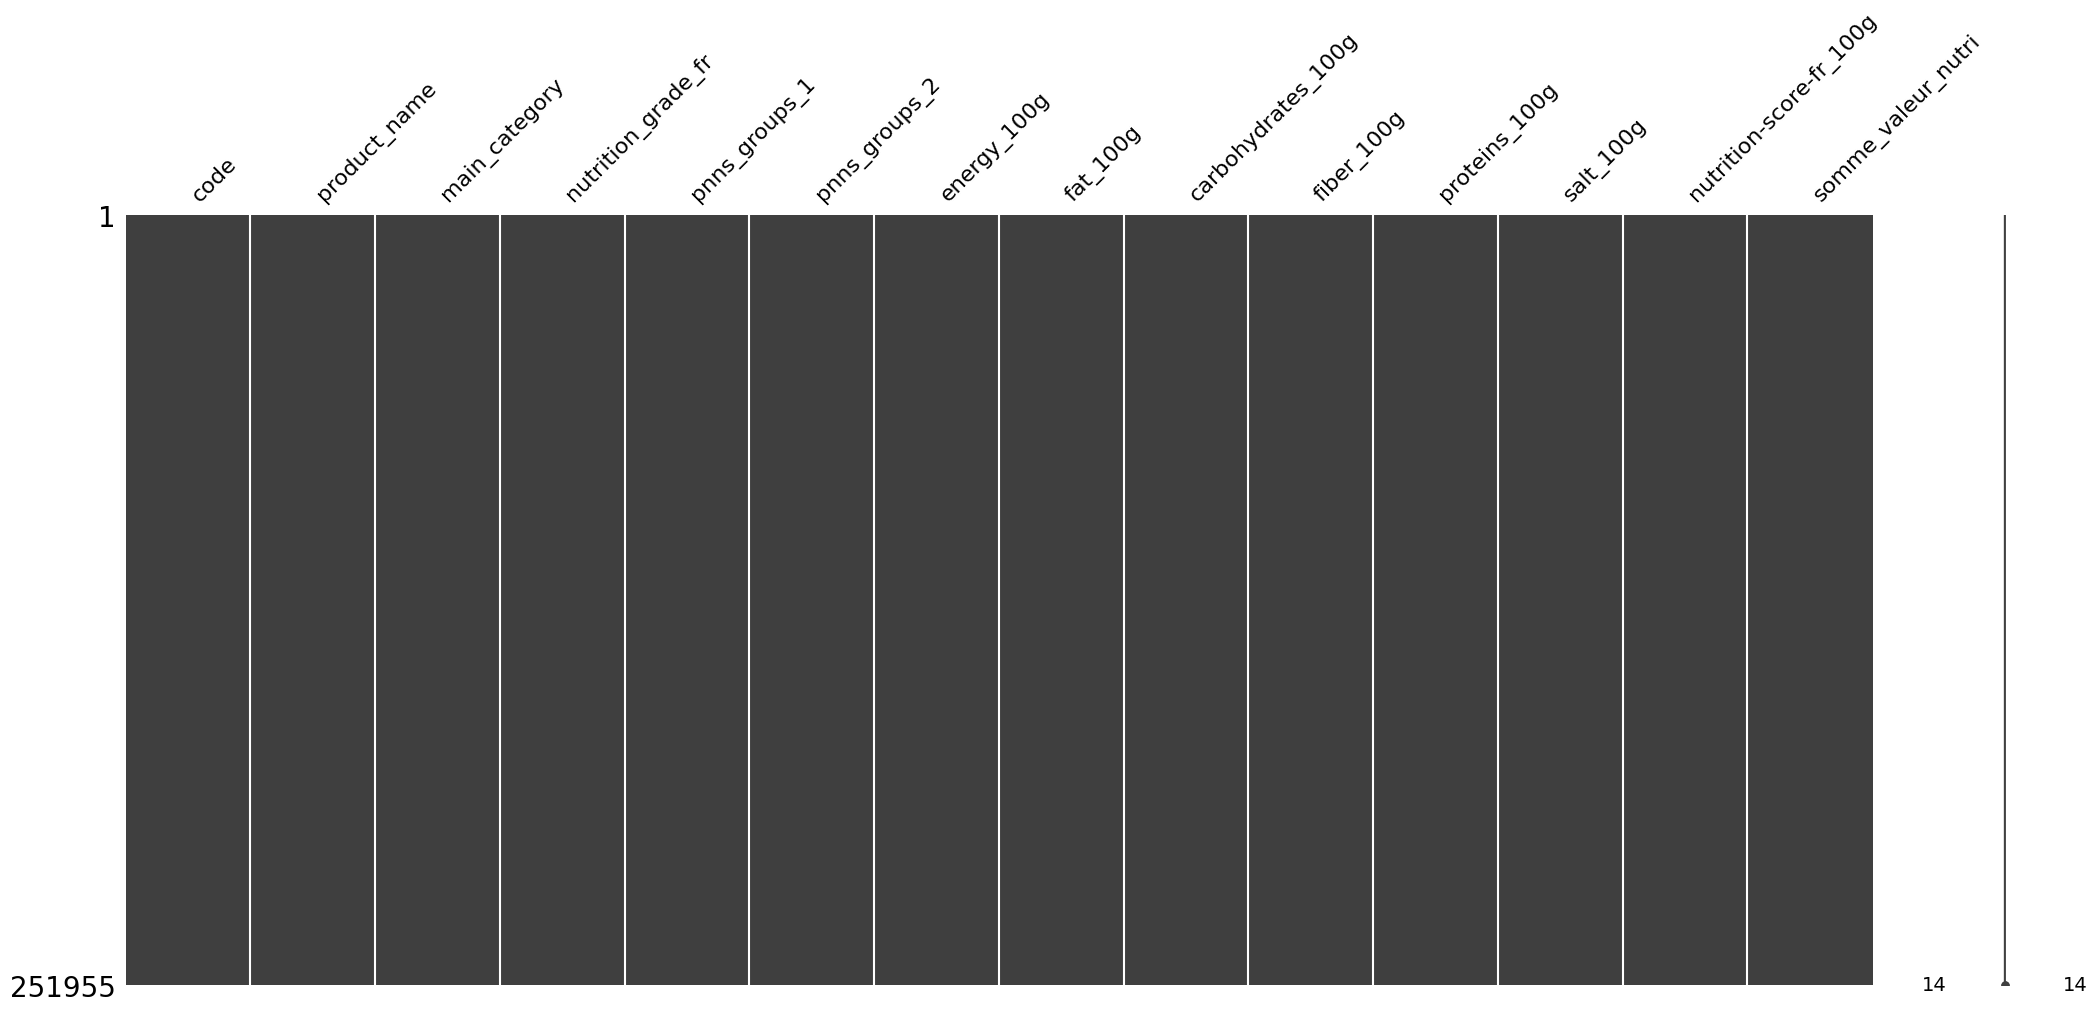

In [54]:
print(df.isna().mean())
msno.matrix(df)
print(df.info())

## V- Analyses statistiques

### A- Analyse sur données nettoyées et imputées

In [55]:
df.describe()

energy_100g       fat_100g  carbohydrates_100g     fiber_100g  \
count  251955.000000  251955.000000       251955.000000  251955.000000   
mean     1097.460085      11.764569           30.149660       2.012262   
std       783.763713      16.849543           28.876565       3.090446   
min         0.000000       0.000000            0.000000       0.000000   
25%       366.000000       0.000000            4.800000       0.000000   
50%      1059.000000       4.100000           17.710000       0.800000   
75%      1644.000000      18.000000           56.000000       3.000000   
max      3700.000000     100.000000          100.000000      45.000000   

       proteins_100g      salt_100g  nutrition-score-fr_100g  \
count  251955.000000  251955.000000            251955.000000   
mean        6.785074       1.569797                 8.981368   
std         7.692782       6.196257                 8.811727   
min         0.000000       0.000000               -15.000000   
25%         0.500000       0.060960                 1.000000   
50%         4.500000       0.570000                 9.000000   
75%         9.930000       1.361440                16.000000   
max        60.000000     100.000000                40.000000   

       somme_valeur_nutri  
count       251955.000000  
mean            51.968738  
std             34.330785  
min              0.000000  
25%             19.640000  
50%             47.451780  
75%             88.863350  
max            105.000000

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

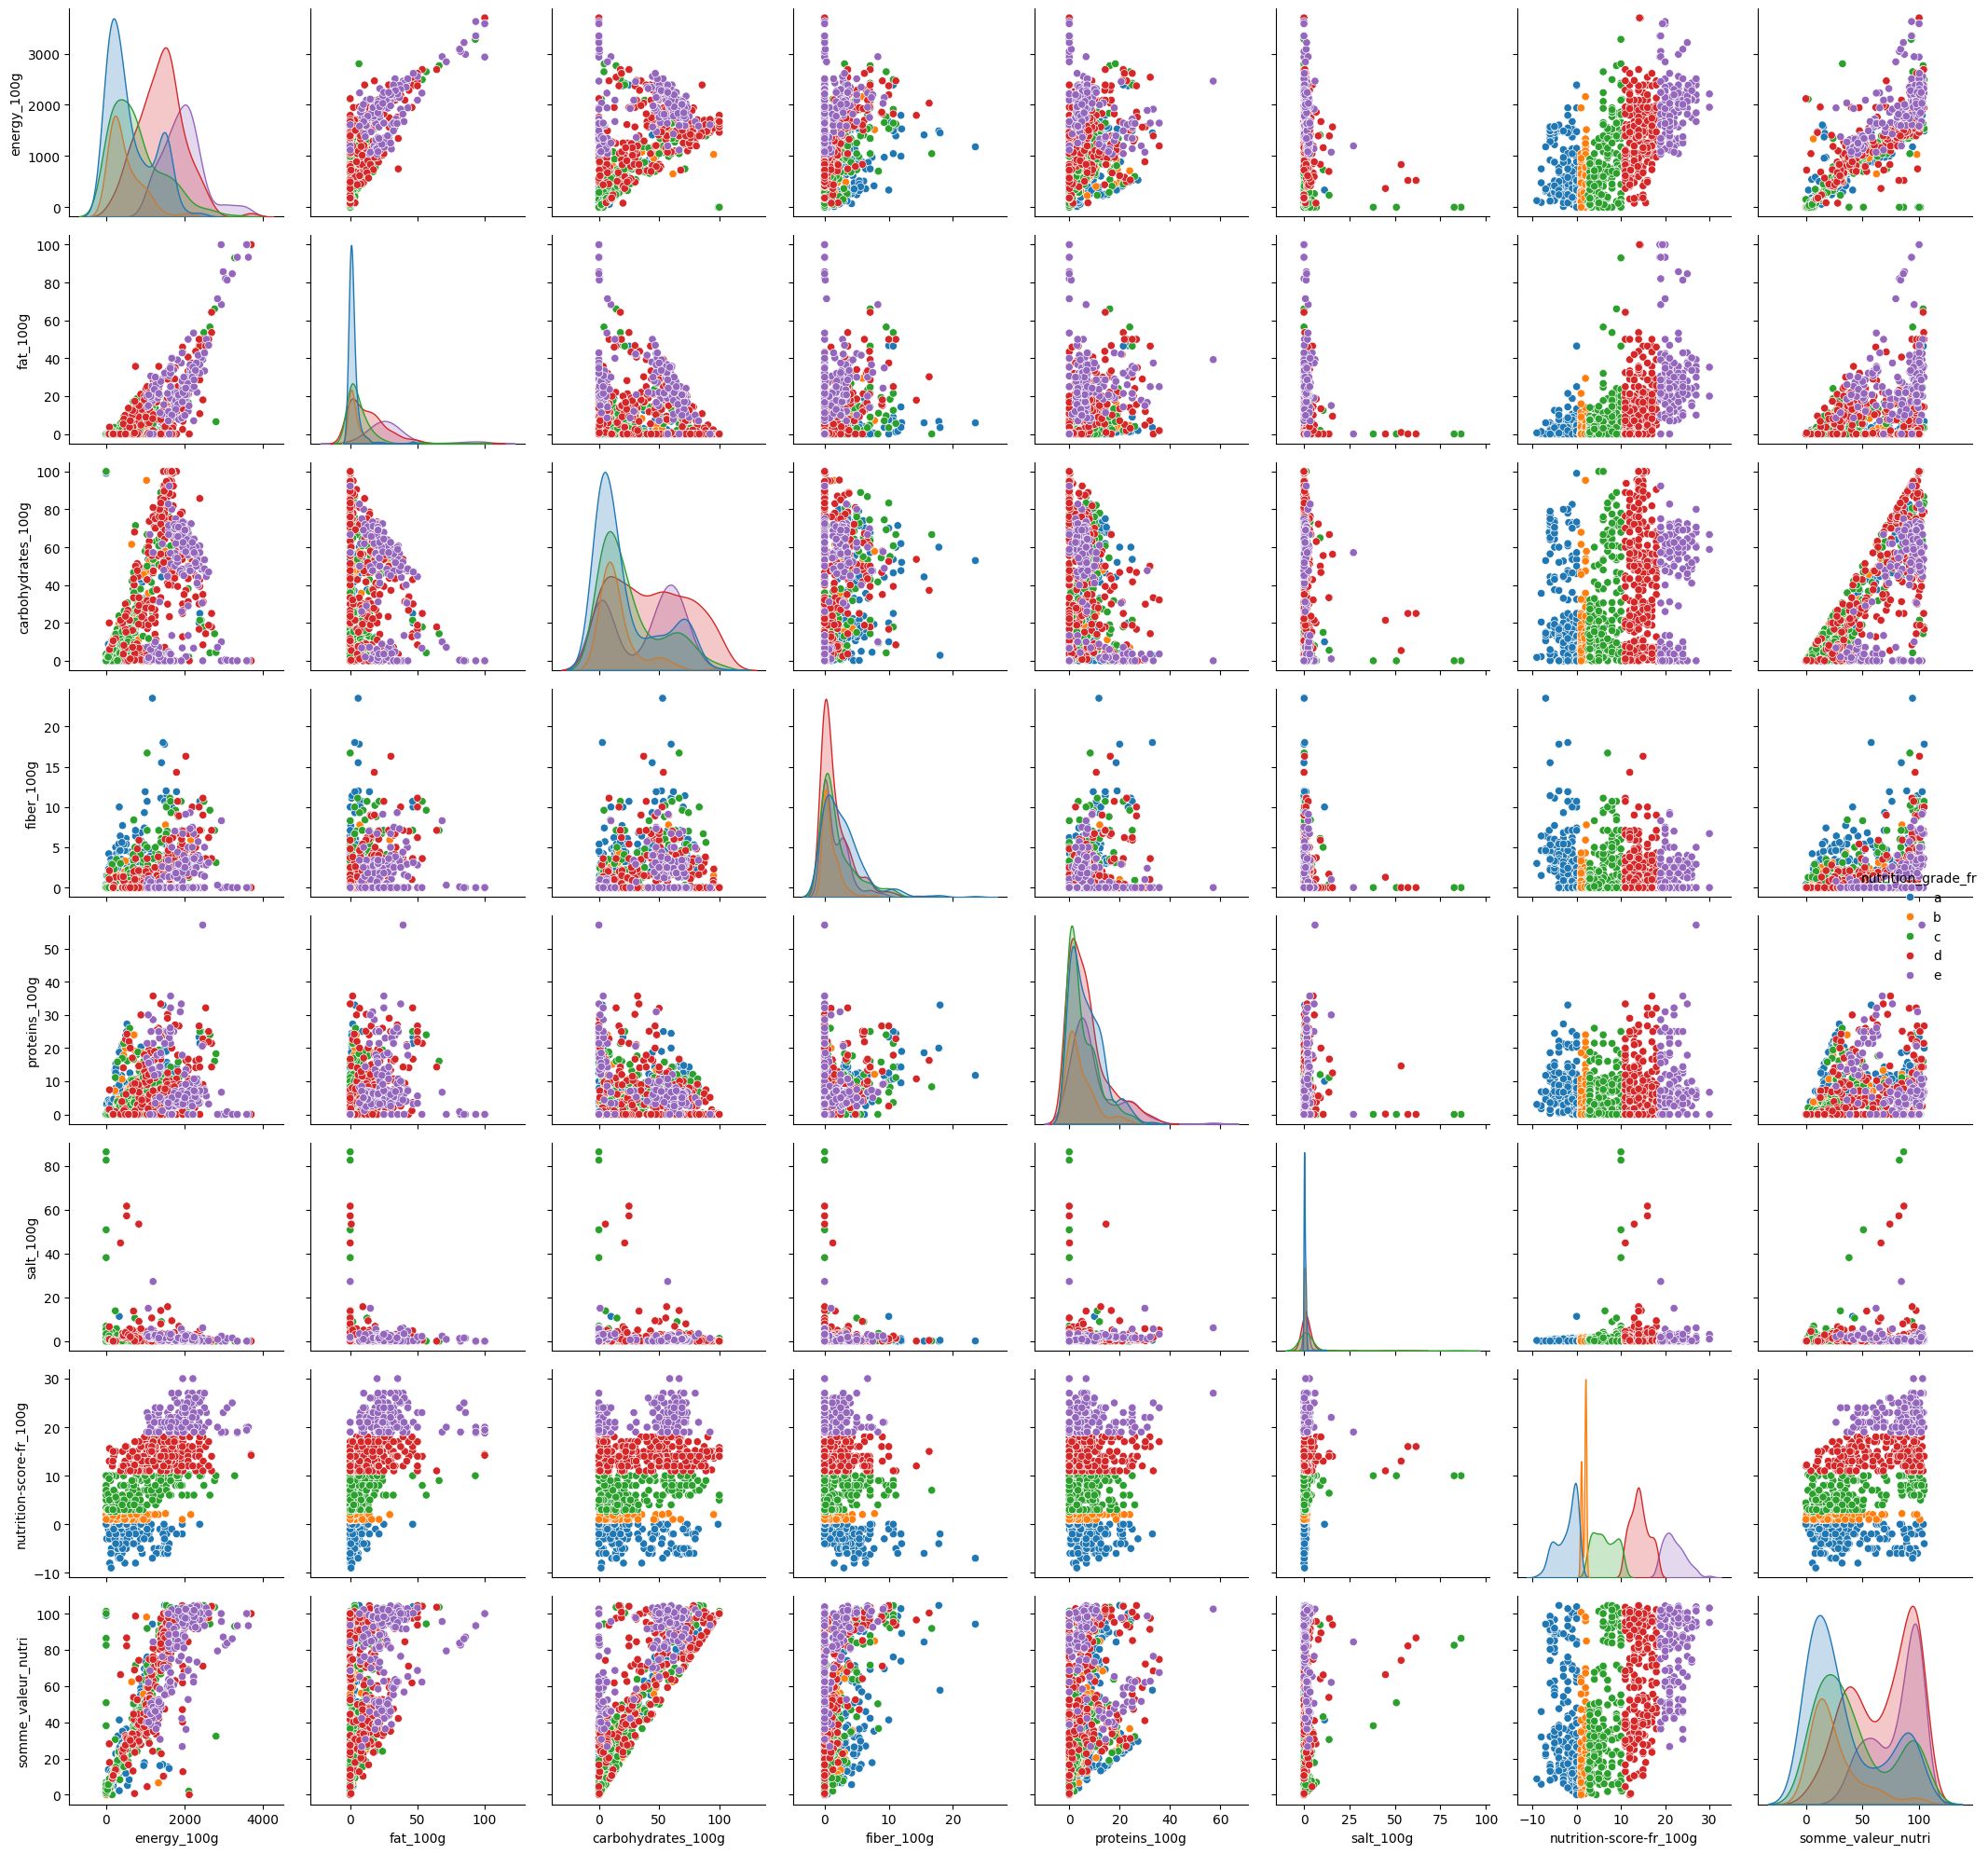

In [56]:
#Analyse bivariée
plt.figure()
sns.pairplot(df.sample(1000).sort_values(by='nutrition_grade_fr'), hue='nutrition_grade_fr')
plt.tight_layout()
plt.show

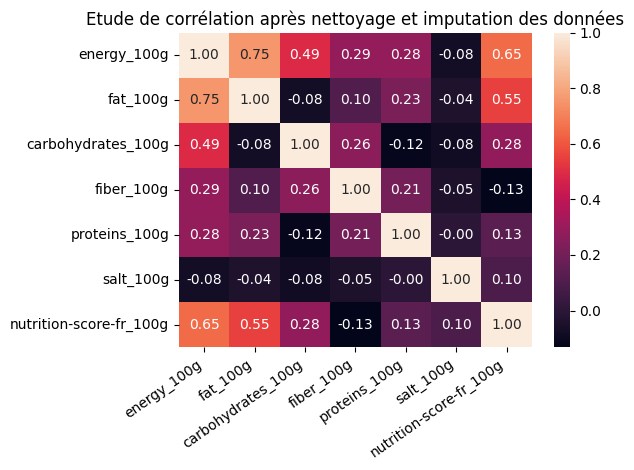

In [57]:
#Etude de corrélation
plt.figure()
sns.heatmap(df[colonnes_correlation].corr(), annot = True, fmt='.2f')
plt.title('Etude de corrélation après nettoyage et imputation des données')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

Ces analyses du jeu de données mettent en évidence que l'imputation des données manquantes n'a pas entraîné de gros changement sur la tendance de nos données nettoyé, permettant de continuer avec un jeu de données complet. 

### B- Analyse en composante principale (ACP)
Les deux objectifs principaux lors d'une ACP sont l'étude de la variabilité des individus et le lien entre les variables. On cherche à créer des dimensions synthétiques calculées à partir des dimensions initiales dans le but de réduire le nombre de dimensions en perdant le moins d'informations possibles. Pour cela, plusieurs étapes à suivre :

#### Centrer-réduire les données

In [58]:
X = df.select_dtypes(include='float64').drop('nutrition-score-fr_100g', axis=1)
names = X.index
features = X.columns

#Scaler les données quantitatives
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled[:5]

#On vérifie si moyenne = 0 et écart-type = 1
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6
mean -0.0 -0.0 -0.0  0.0 -0.0 -0.0 -0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0

#### ACP

In [59]:
#Nous allons travailler sur les 6 premières composantes
n_components = 6

#On instancie notre ACP
pca = PCA(n_components=n_components)

#On l'entraîne sur les données scalées
pca.fit(X_scaled)

PCA(n_components=6)

#### Explained variance & scree plot

In [60]:
#Variance captée par chaque nouvelle composant
pca.explained_variance_ratio_

scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([42.32, 18.85, 14.58, 13.92,  9.36,  0.94])

In [61]:
#Somme cumulée de la variance (.cumsum())
scree_cum = scree.cumsum().round()
scree_cum

array([ 42.,  61.,  76.,  90.,  99., 100.])

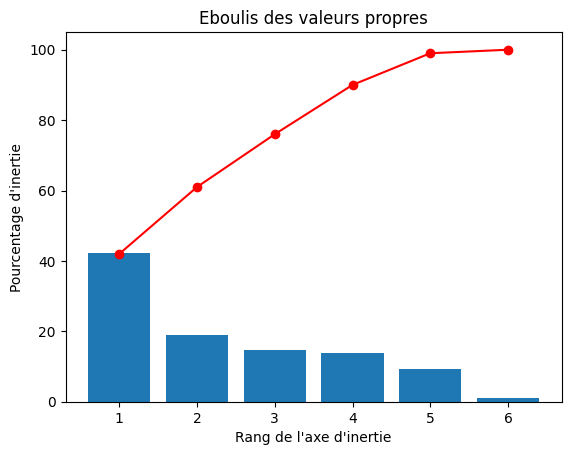

In [62]:
#définir variable avec la liste de nos composantes
X_list = range(1, n_components+1)
list(X_list)

#Représentation graphique
plt.bar(X_list, scree)
plt.plot(X_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie")
plt.ylabel("Pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que près de 75% de la variance est comprise dans les 3 premières composantes, et près de 90% dans les 4 premières. Les composantes 5 et 6 ne sont pas très utile.

#### Composantes

In [63]:
#Calcul des composantes
pcs = pca.components_
pcs = pd.DataFrame(pcs)
print(pcs)

          0         1         2         3         4         5         6
0  0.545945  0.367502  0.370380  0.282535  0.200778 -0.028994  0.555632
1  0.134692  0.526247 -0.637289 -0.123343  0.502773  0.029141 -0.173036
2 -0.058022 -0.079923 -0.009877 -0.003650  0.077579  0.981881  0.141515
3 -0.222045 -0.383824 -0.045983  0.692999  0.558378 -0.078362 -0.055552
4  0.005187  0.328439 -0.285380  0.648598 -0.601319  0.094226 -0.139702
5 -0.794356  0.452628  0.150647 -0.016726  0.055569 -0.065744  0.365708


                          F1        F2        F3        F4        F5        F6
energy_100g         0.545945  0.134692 -0.058022 -0.222045  0.005187 -0.794356
fat_100g            0.367502  0.526247 -0.079923 -0.383824  0.328439  0.452628
carbohydrates_100g  0.370380 -0.637289 -0.009877 -0.045983 -0.285380  0.150647
fiber_100g          0.282535 -0.123343 -0.003650  0.692999  0.648598 -0.016726
proteins_100g       0.200778  0.502773  0.077579  0.558378 -0.601319  0.055569
salt_100g          -0.028994  0.029141  0.981881 -0.078362  0.094226 -0.065744
somme_valeur_nutri  0.555632 -0.173036  0.141515 -0.055552 -0.139702  0.365708


<Axes: >

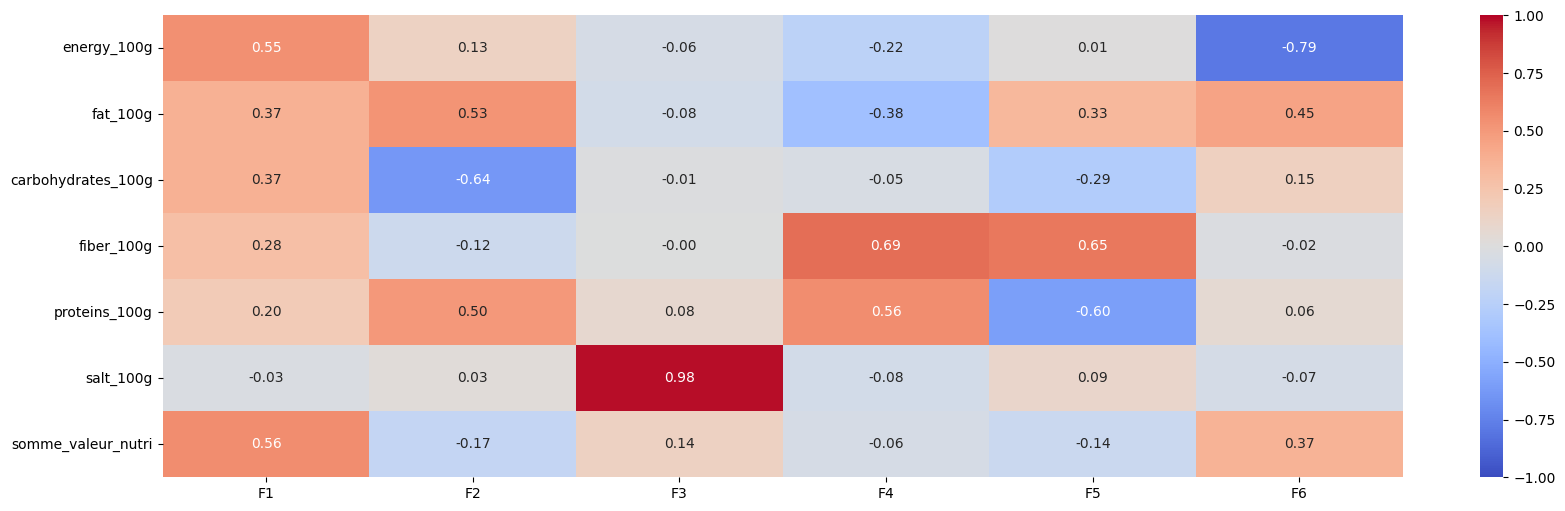

In [64]:
pcs.columns = features
pcs.index = [f"F{i}" for i in X_list]
pcs.round(2)
print(pcs.T)

#Représentation graphique 
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

#### Graphique de corrélation

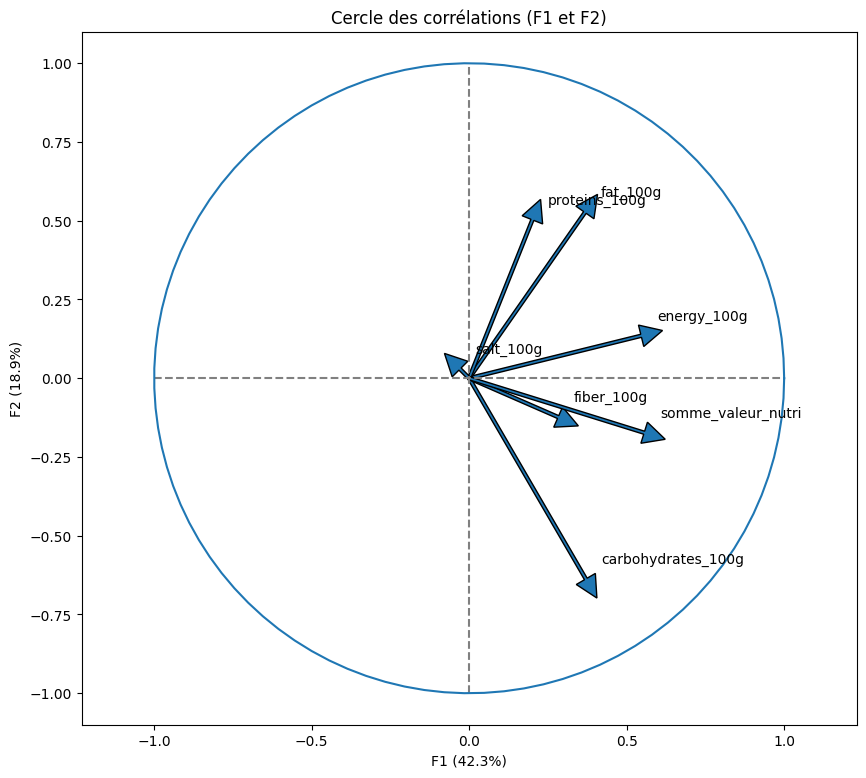

In [65]:
#Définir nos axes x et y 
x, y = 0, 1

#Représentation graphique 
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.01, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

x_y = (0,1)

#Pour F1 et F2
x_y = (0,1)
correlation_graph(pca, x_y, features)

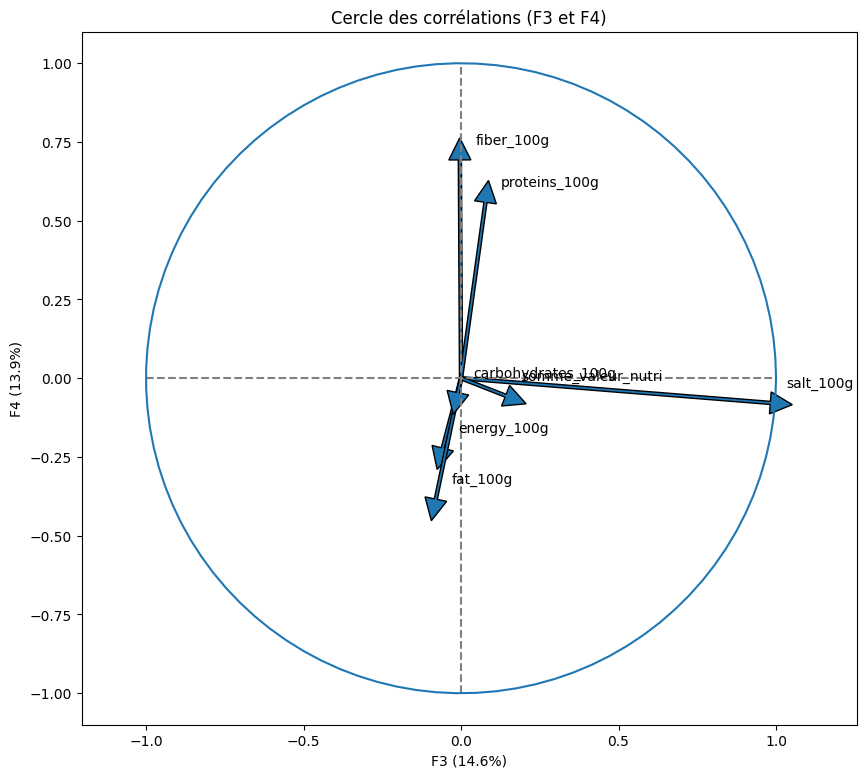

In [66]:
#Pour F3 et F4
correlation_graph(pca, (2,3), features)

#### Projection des dimensions

In [67]:
#Calcul des coordonnées des individus dans le nouvel espace
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 2.44882921, -0.55484303, -0.26113563, -0.69697298,  0.36284672,
        -0.0346605 ],
       [ 2.71584476, -0.08582972,  0.07089314,  1.44560972, -0.20215641,
         0.08663474],
       [ 3.38921251,  2.20738227, -0.06402142,  0.44673417,  1.01203905,
         0.2731646 ],
       [ 1.7464782 , -1.52560957, -0.06701887,  0.94200277, -0.21855876,
        -0.04820426],
       [ 2.67683825, -0.44316607, -0.08236119,  1.25942186,  0.2439944 ,
         0.07822781]])

In [68]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

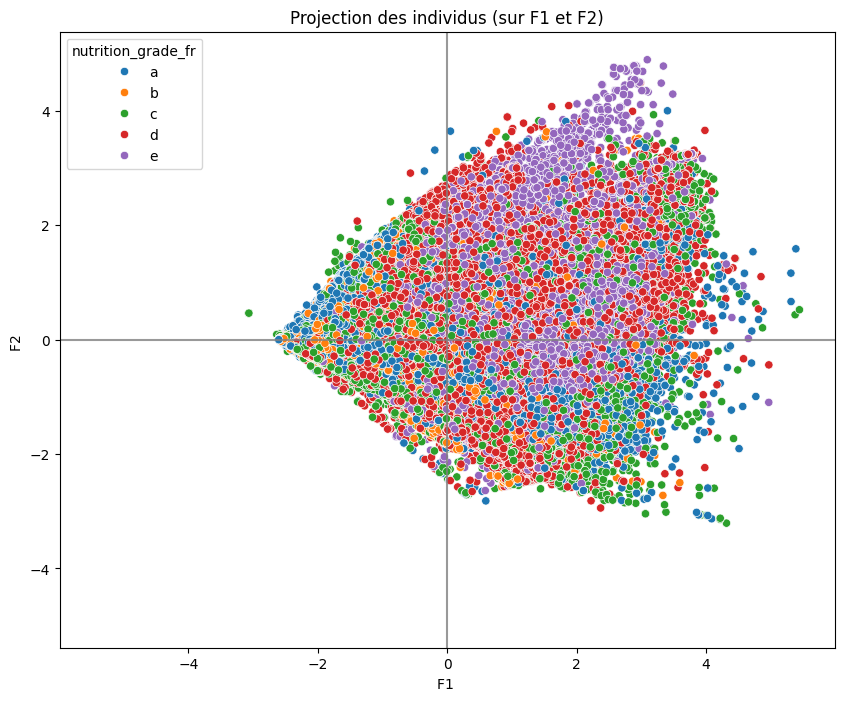

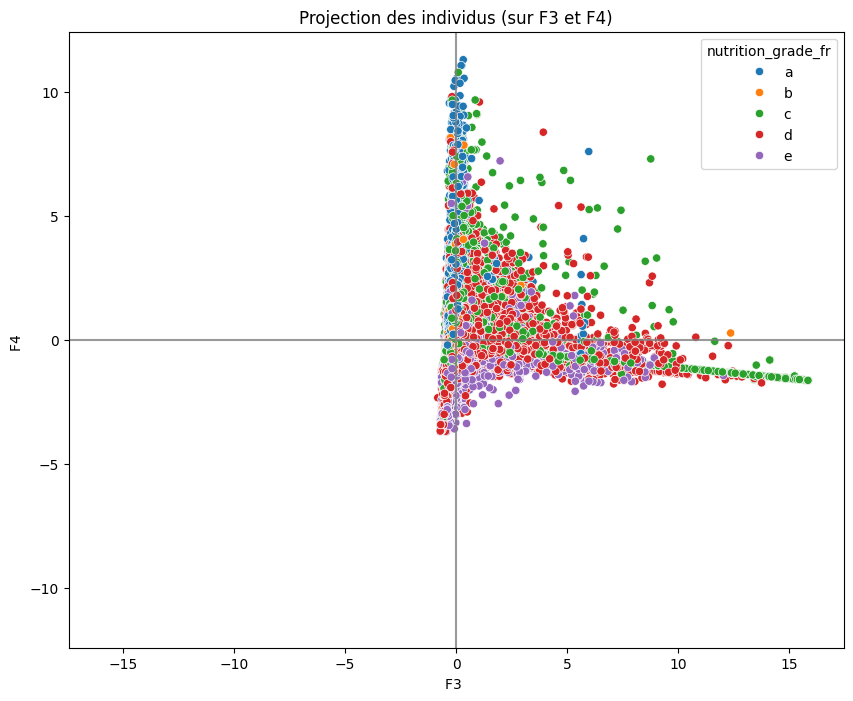

In [69]:
#F1 et F2
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=df['nutrition_grade_fr'])

#F2 et F3
x_y = 2, 3
display_factorial_planes(X_proj, x_y, clusters=df['nutrition_grade_fr'])

l'ACP a permis l'identification de 4 composantes principales (F1 à F4), qui représentent les axes principaux d'inertie. Ces 4 axes principaux d'inertie cumulent 90% de l'inertie du nuage de points des individus.  Les composantes suivante (5 et plus) ne sont pas très utile car peu représentatif.

- La composante F1 est corrélée positivement avec la somme totale des valeurs nutritionnelle et l'energie.
- La composante F2 est corrélée positivement avec le gras et les protéines, et négativement avec les glucides. Si l'on se déplace sur la composante F2, les produits sont de plus en plus gras et de moins en moins sucrés, ce qui impacte le nutrition grade qui sera représenté avec les produits allant de A vers E.
- La composante F3 est corrélée avec le sel. Si l'on se déplace sur la composante F3, les produits sont de plus en plus salés, et correspondent à un nutrition_grade allant du rang A à un rang entre B et D.
- La composante F4 est corrélée  positivement avec les protéines et les fibres. Si l'on se déplace sur la composante F4, les produits seront composés de plus de fibres et de protéines, et le nutrition_grade sera représenté dans le sens inverse, les produits auront donc un meilleur rang, allant de E vers A.

On peut donc émettre l'hypothèse que les rangs du nutrition grade représente :
- A : produits avec peu de gras et plus de protéine et de fibre
- B : un peu de tout mais plus salé
- C : un peu de tout mais plus de gras et de sel et donc d'énergie
- D : produit salé et gras, avec peu de fibre et de protéine
- E : produits gras et très énergétique sans apport de protéine ou de fibre

### C- Analyse de la variance

Étudions maintenant l'analyse de la variance entre chaque variable quantitative et le nutrition_grade. 

Nous avons tenter de vérifier si nos données suivent une loi normale avec le test de Shapiro-Wilk, mais ce dernier devient très sensible aux variations avec des échantillons trop grand.  Par conséquent, nous optons plutôt pour le test de Kolmogorov-Smirnov, qui présente une sensibilité moindre et nous permet de vérifier si nos données suivent une loi normale.

In [70]:
# Test de Kolmogorov-Smirnov pour chaque colonne quantitative
colonnes_quanti = df.select_dtypes(include='float64')

for colonne in colonnes_quanti.columns:
    statistic, p_value = kstest(df[colonne], 'norm')
    
    print(f"Test de Kolmogorov-Smirnov pour {colonne}:")
    print(f"Statistic: {statistic}")
    print(f"P-value: {p_value}")
    
    # Tester l'hypothèse nulle (H0) : Les données suivent une distribution normale
    alpha = 0.05
    if p_value > alpha:
        print("Conclusion: Les données suivent une distribution normale (H0 n'est pas rejetée)\n")
    else:
        print("Conclusion: Les données ne suivent pas une distribution normale (H0 est rejetée)\n")

Test de Kolmogorov-Smirnov pour energy_100g:
Statistic: 0.9631681064962551
P-value: 0.0
Conclusion: Les données ne suivent pas une distribution normale (H0 est rejetée)

Test de Kolmogorov-Smirnov pour fat_100g:
Statistic: 0.5720166691549182
P-value: 0.0
Conclusion: Les données ne suivent pas une distribution normale (H0 est rejetée)

Test de Kolmogorov-Smirnov pour carbohydrates_100g:
Statistic: 0.8240933649772542
P-value: 0.0
Conclusion: Les données ne suivent pas une distribution normale (H0 est rejetée)

Test de Kolmogorov-Smirnov pour fiber_100g:
Statistic: 0.5
P-value: 0.0
Conclusion: Les données ne suivent pas une distribution normale (H0 est rejetée)

Test de Kolmogorov-Smirnov pour proteins_100g:
Statistic: 0.6404913198983807
P-value: 0.0
Conclusion: Les données ne suivent pas une distribution normale (H0 est rejetée)

Test de Kolmogorov-Smirnov pour salt_100g:
Statistic: 0.5
P-value: 0.0
Conclusion: Les données ne suivent pas une distribution normale (H0 est rejetée)

Test de

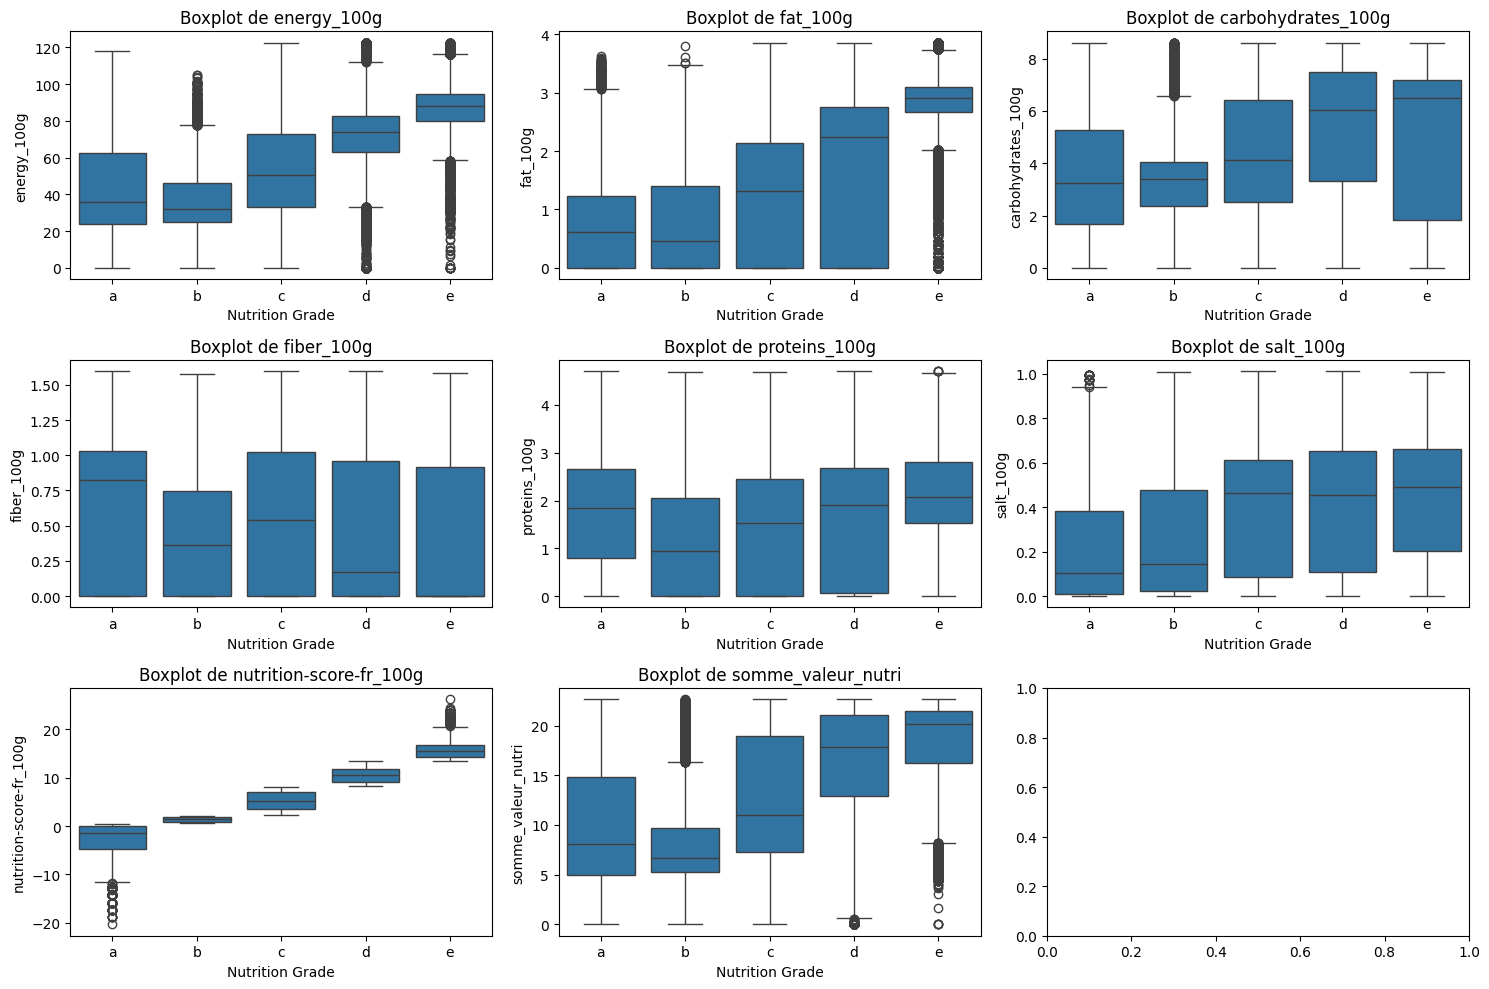

Test de Kolmogorov-Smirnov pour energy_100g:
Statistic: 0.9619998422262191
P-value: 0.0
Conclusion: Les données ne suivent pas une distribution normale (H0 est rejetée)

Test de Kolmogorov-Smirnov pour fat_100g:
Statistic: 0.5
P-value: 0.0
Conclusion: Les données ne suivent pas une distribution normale (H0 est rejetée)

Test de Kolmogorov-Smirnov pour carbohydrates_100g:
Statistic: 0.7725407281267868
P-value: 0.0
Conclusion: Les données ne suivent pas une distribution normale (H0 est rejetée)

Test de Kolmogorov-Smirnov pour fiber_100g:
Statistic: 0.5
P-value: 0.0
Conclusion: Les données ne suivent pas une distribution normale (H0 est rejetée)

Test de Kolmogorov-Smirnov pour proteins_100g:
Statistic: 0.5438595801708093
P-value: 0.0
Conclusion: Les données ne suivent pas une distribution normale (H0 est rejetée)

Test de Kolmogorov-Smirnov pour salt_100g:
Statistic: 0.5
P-value: 0.0
Conclusion: Les données ne suivent pas une distribution normale (H0 est rejetée)

Test de Kolmogorov-Smi

In [71]:
# Appliquer la transformation de Yeo-Johnson
for colonne in colonnes_quanti.columns:
    df[colonne], _ = yeojohnson(df[colonne])

# Représentation graphique
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes_flat = axes.flatten()

for i, column in enumerate(colonnes_quanti.columns):
    ax = axes_flat[i]
    sns.boxplot(x='nutrition_grade_fr', y=column, data=df, ax=ax)
    ax.set_title(f'Boxplot de {column}')
    ax.set_xlabel('Nutrition Grade')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()

#Test de Kolmogorov-Smirnov
for colonne in colonnes_quanti.columns:
    statistic, p_value = kstest(df[colonne], 'norm')
    
    print(f"Test de Kolmogorov-Smirnov pour {colonne}:")
    print(f"Statistic: {statistic}")
    print(f"P-value: {p_value}")
    
    # Tester l'hypothèse nulle (H0) : Les données suivent une distribution normale
    alpha = 0.05
    if p_value > alpha:
        print("Conclusion: Les données suivent une distribution normale (H0 n'est pas rejetée)\n")
    else:
        print("Conclusion: Les données ne suivent pas une distribution normale (H0 est rejetée)\n")

IndexError: list index out of range

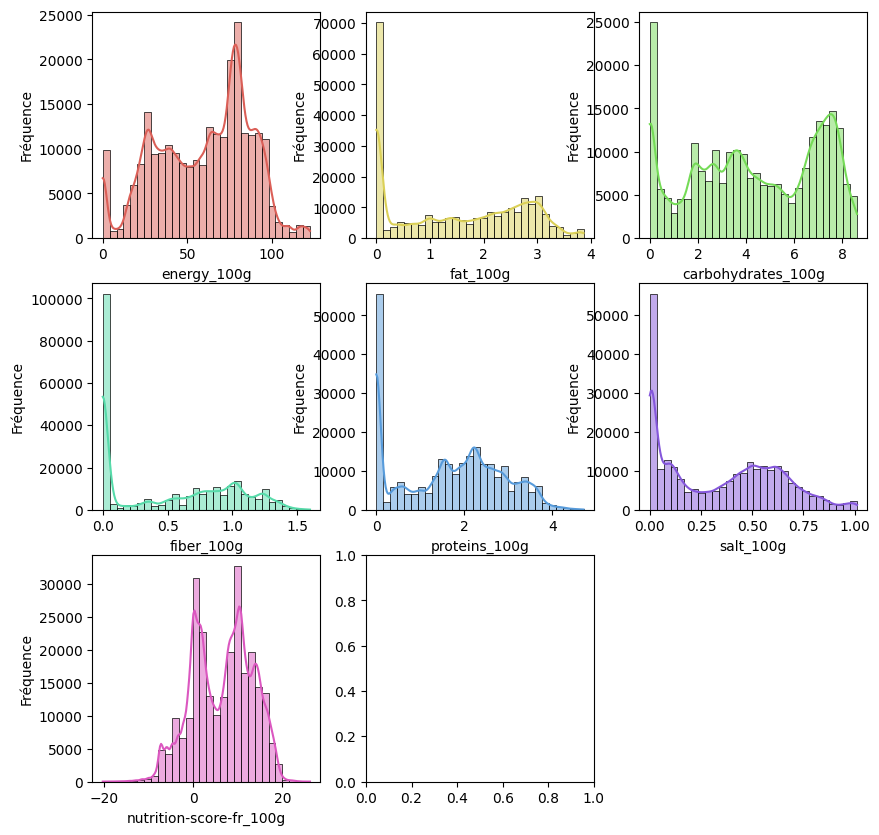

In [76]:
plt.figure(figsize=(10, 10))
for i, colonne in enumerate(colonnes_quanti.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[colonne], kde=True, bins=30, color=palette[i])
    plt.xlabel(colonne)
    plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

Malgré l'application de la transformation de Yeo-Johnson, nos données ne présentent toujours pas une distribution normale. Cette observation peut être attribuée à la prépondérance d'un grand nombre de valeurs proches de zéro. Bien que nos données ne suivent pas une loi normale, nous avons néanmoins procédé à un test ANOVA, où les p-values se sont révélées toutes égales à 0.00 pour chacune de nos comparaisons. Dans la mesure où nos données ne respectent pas les conditions d'une distribution normale, nous optons donc pour le test de Kruskal-Wallis, un test non paramétrique, afin de confirmer les résultats.

In [ ]:
variable_qualitative = 'nutrition_grade_fr'

# Liste pour stocker les résultats
resultats_kw = []

for colonne_quanti in colonnes_quanti.columns:
    # Créer des groupes basés sur la variable qualitative
    groupes = [df[colonne_quanti][df[variable_qualitative] == grade] for grade in df[variable_qualitative].unique()]
    
    # Effectuer le test de Kruskal-Wallis
    statistique, p_valeur = kruskal(*groupes)
    
    # Stocker les résultats
    resultats_kw.append({
        'Variable Quantitative': colonne_quanti,
        'Statistique': statistique,
        'P-valeur': p_valeur
    })

# Créer un DataFrame avec les résultats
resultats_kw_df = pd.DataFrame(resultats_kw)
print(resultats_kw_df)

# Représentation graphique
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes_flat = axes.flatten()

for i, column in enumerate(colonnes_quanti.columns):
    ax = axes_flat[i]
    sns.boxplot(x='nutrition_grade_fr', y=column, data=df, ax=ax)
    ax.set_title(f'Boxplot de {column}')
    ax.set_xlabel('Nutrition Grade')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()

Au vu des résultats du test de Kruskal-Wallis pour chaque variable quantitative par rapport à la variable qualitative 'nutrition_grade_fr', les résultats de l'ANOVA sont confirmés. Voici une interprétation :

 - **energy_100g** : La p-valeur est très proche de zéro, indiquant une différence significative avec le 'nutrition_grade_fr'. Cela suggère que l'apport énergétique varie de manière significative entre les différents niveaux de nutrition, c'est-à-dire que l'apport énergétique augmente avec le nutrition score (plus il augmente, plus il se rapproche de 'E').

- **fat_100g** : La p-valeur est très proche de zéro, indiquant une différence significative avec le 'nutrition_grade_fr'. Cela suggère que la quantité de gras pour 100g varie significativement en fonction du niveau de nutrition, c'est-à-dire que la quantité de gras augmente en se rapproche du rang E de 'nutrition_grade_fr'.

- **carbohydrates_100g** : La p-valeur est très proche de zéro, indiquant une différence significative avec le 'nutrition_grade_fr'. Cela suggère que la quantité de glucides pour 100g varie significativement en fonction du niveau de nutrition, augmente avec un rang qui va de A vers E.

- **fiber_100g** : La p-valeur est très proche de zéro, indiquant une différence significative avec le 'nutrition_grade_fr'. Cela suggère que la quantité de fibres pour 100g varie significativement en fonction du niveau de nutrition, en diminuant avec un rang qui va de A vers E.

- **proteins_100g** : La p-valeur est très proche de zéro, indiquant une différence significative avec le 'nutrition_grade_fr'. Cela suggère que la quantité de protéines pour 100g varie significativement en fonction du niveau de nutrition, en diminuant avec un rang qui va de A vers E.

- **salt_100g** : La p-valeur est très proche de zéro, indiquant une différence significative avec le 'nutrition_grade_fr'. Cela suggère que la quantité de sel pour 100g varie significativement en fonction du niveau de nutrition, en augmentant avec un rang qui va de A vers E.

- **somme_valeur_nutri** : La p-valeur est très proche de zéro, indiquant une différence significative avec le 'nutrition_grade_fr'. Cela suggère que la somme des valeurs nutritionnelles varie significativement en fonction du niveau de nutrition, en augmentant avec un rang qui va de A vers E.


Globalement, les résultats suggèrent que toutes les variables nutritionnelles étudiées présentent des variations significatives en fonction du niveau de 'nutrition_grade_fr'. Cela signifie que les nutriments varient entre les différentes catégories (A à E).

## VI - Les 5 grands principes de la RGDP

1) Ne collecter que les données vraiment nécessaires pour atteindre votre objectif

2) Etre transparent

3) Organisez et facilitez l'exercice des droits des personnes

4) Fixez des durées de conservation

5) Sécurisez les données et identifiez les risques

6) Inscrivez la mise en conformité dans une démarche continue

Les données sont collectées pour un but bien déterminé et légitime : informer les consommateurs de la qualité nutritionnelle des produits qu'ils consomment. C'est les utilisateurs de l'application eux-même qui auront le choix de transmettre l'information ou non. L'accès à la base de données est open source avec des informations disponibles avant le téléchargement de l’application (sur l’espace du magasin). Les données collectées ne sont donc pas personnelles mais concernent la qualité nutritionnelle des produits mis en vente dans les grandes surfaces.

## VII- Conclusion

En conclusion, cette analyse approfondie souligne l'importance cruciale du nutrition grade en tant qu'outil essentiel pour évaluer la qualité nutritionnelle des produits alimentaires. En effet, cet indicateur va au-delà de la simple quantification calorique en intégrant une évaluation détaillée des différents nutriments présents dans les aliments.

L'analyse du jeu de données effectuée révèle une hiérarchie claire parmi les produits évalués. Ceux qui se distinguent par une faible teneur calorique, combinée à une richesse en fibres ou en protéines, sont identifiés comme les plus favorables à la santé. Les produits équilibrés en nutriments ou légèrement salés suivent dans cette échelle, tandis que les produits à éviter sont ceux qui se caractérisent par une forte teneur en sucre ou en gras, avec un apport calorique élevé.

Les données sont imputables sans altérer leur distribution ni leur corrélation, confirmant ainsi la faisabilité de l'application envisagée, à savoir un système de suggestion ou d'auto-complétion, pour aider les usagers à remplir plus efficacement la base de données.